<a href="https://colab.research.google.com/github/ChrisChukwunyereNwaiwu/Supply-Chain-Project/blob/main/Supplychain_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=0f413b8c2376553d419792fd9f90aa9e3004493de70049d7d215b3f7f1a33717
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [ ]:
!pip install fastcluster

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.0/194.0 kB 5.7 MB/s eta 0:00:00


Import Libraries

In [ ]:
!pip install prophet

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import mean_squared_error
import warnings
import tensorflow as tf
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import logging
import statsmodels.api as sm

In [ ]:
tf.__version__

'2.12.0'

Data Preprocessing

Import Dataset

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
df = pd.read_excel(url)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
#Drop the description column
df = df.drop("Description", axis=1)

#working with only the United Kingdom data, so i filtered other countries

In [ ]:
df = df[df['Country'] == 'United Kingdom']
df_filtered = df[df['Country'] == 'United Kingdom']

In [ ]:
# Check and print the unique values in the country column
unique_countries = df_filtered['Country'].unique()
print(unique_countries)


['United Kingdom']


# Count the records for each country

In [ ]:
country_counts = df_filtered['Country'].value_counts()
print(country_counts)

United Kingdom    495478
Name: Country, dtype: int64


# Create a bar plot

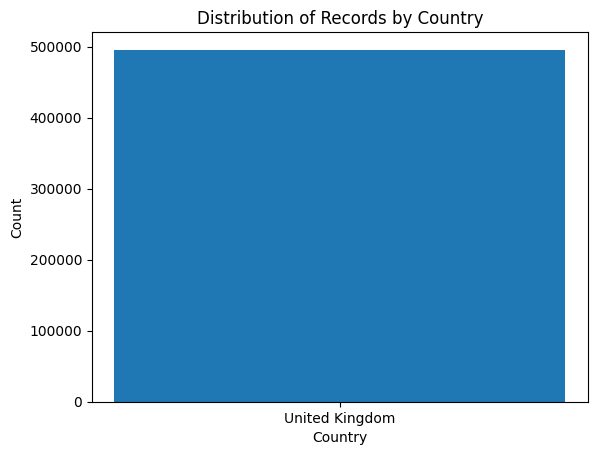

In [ ]:
plt.bar(country_counts.index, country_counts.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Records by Country')
plt.show()

#Check the shape of the dataset

In [ ]:
df.shape

(495478, 7)

# Check the data types of columns

In [ ]:
data_types = df.dtypes
print(data_types)

InvoiceNo              object
StockCode              object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


#Check the basic info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495478 entries, 0 to 541893
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    495478 non-null  object        
 1   StockCode    495478 non-null  object        
 2   Quantity     495478 non-null  int64         
 3   InvoiceDate  495478 non-null  datetime64[ns]
 4   UnitPrice    495478 non-null  float64       
 5   CustomerID   361878 non-null  float64       
 6   Country      495478 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 30.2+ MB


#check the data head

In [ ]:
df.head(20)

InvoiceNo StockCode  Quantity         InvoiceDate  UnitPrice  CustomerID  \
0     536365    85123A         6 2010-12-01 08:26:00       2.55     17850.0   
1     536365     71053         6 2010-12-01 08:26:00       3.39     17850.0   
2     536365    84406B         8 2010-12-01 08:26:00       2.75     17850.0   
3     536365    84029G         6 2010-12-01 08:26:00       3.39     17850.0   
4     536365    84029E         6 2010-12-01 08:26:00       3.39     17850.0   
5     536365     22752         2 2010-12-01 08:26:00       7.65     17850.0   
6     536365     21730         6 2010-12-01 08:26:00       4.25     17850.0   
7     536366     22633         6 2010-12-01 08:28:00       1.85     17850.0   
8     536366     22632         6 2010-12-01 08:28:00       1.85     17850.0   
9     536367     84879        32 2010-12-01 08:34:00       1.69     13047.0   
10    536367     22745         6 2010-12-01 08:34:00       2.10     13047.0   
11    536367     22748         6 2010-12-01 08:34:00       2.10     13047.0   
12    536367     22749         8 2010-12-01 08:34:00       3.75     13047.0   
13    536367     22310         6 2010-12-01 08:34:00       1.65     13047.0   
14    536367     84969         6 2010-12-01 08:34:00       4.25     13047.0   
15    536367     22623         3 2010-12-01 08:34:00       4.95     13047.0   
16    536367     22622         2 2010-12-01 08:34:00       9.95     13047.0   
17    536367     21754         3 2010-12-01 08:34:00       5.95     13047.0   
18    536367     21755         3 2010-12-01 08:34:00       5.95     13047.0   
19    536367     21777         4 2010-12-01 08:34:00       7.95     13047.0   

           Country  
0   United Kingdom  
1   United Kingdom  
2   United Kingdom  
3   United Kingdom  
4   United Kingdom  
5   United Kingdom  
6   United Kingdom  
7   United Kingdom  
8   United Kingdom  
9   United Kingdom  
10  United Kingdom  
11  United Kingdom  
12  United Kingdom  
13  United Kingdom  
14  United Kingdom  
15  United Kingdom  
16  United Kingdom  
17  United Kingdom  
18  United Kingdom  
19  United Kingdom

Let's the last data in the last columns and rows

In [ ]:
df.tail(10)

InvoiceNo StockCode  Quantity         InvoiceDate  UnitPrice  \
541884    581585     84946        12 2011-12-09 12:31:00       1.25   
541885    581585     21684        12 2011-12-09 12:31:00       0.85   
541886    581585     22398        12 2011-12-09 12:31:00       0.39   
541887    581585     23328         4 2011-12-09 12:31:00       3.75   
541888    581585     23145        12 2011-12-09 12:31:00       0.95   
541889    581585     22466        12 2011-12-09 12:31:00       1.95   
541890    581586     22061         8 2011-12-09 12:49:00       2.95   
541891    581586     23275        24 2011-12-09 12:49:00       1.25   
541892    581586     21217        24 2011-12-09 12:49:00       8.95   
541893    581586     20685        10 2011-12-09 12:49:00       7.08   

        CustomerID         Country  
541884     15804.0  United Kingdom  
541885     15804.0  United Kingdom  
541886     15804.0  United Kingdom  
541887     15804.0  United Kingdom  
541888     15804.0  United Kingdom  
541889     15804.0  United Kingdom  
541890     13113.0  United Kingdom  
541891     13113.0  United Kingdom  
541892     13113.0  United Kingdom  
541893     13113.0  United Kingdom

Transpose the Data

In [ ]:
df.transpose()

0                    1                    2       \
InvoiceNo                 536365               536365               536365   
StockCode                 85123A                71053               84406B   
Quantity                       6                    6                    8   
InvoiceDate  2010-12-01 08:26:00  2010-12-01 08:26:00  2010-12-01 08:26:00   
UnitPrice                   2.55                 3.39                 2.75   
CustomerID               17850.0              17850.0              17850.0   
Country           United Kingdom       United Kingdom       United Kingdom   

                          3                    4                    5       \
InvoiceNo                 536365               536365               536365   
StockCode                 84029G               84029E                22752   
Quantity                       6                    6                    2   
InvoiceDate  2010-12-01 08:26:00  2010-12-01 08:26:00  2010-12-01 08:26:00   
UnitPrice                   3.39                 3.39                 7.65   
CustomerID               17850.0              17850.0              17850.0   
Country           United Kingdom       United Kingdom       United Kingdom   

                          6                    7                    8       \
InvoiceNo                 536365               536366               536366   
StockCode                  21730                22633                22632   
Quantity                       6                    6                    6   
InvoiceDate  2010-12-01 08:26:00  2010-12-01 08:28:00  2010-12-01 08:28:00   
UnitPrice                   4.25                 1.85                 1.85   
CustomerID               17850.0              17850.0              17850.0   
Country           United Kingdom       United Kingdom       United Kingdom   

                          9       ...               541884  \
InvoiceNo                 536367  ...               581585   
StockCode                  84879  ...                84946   
Quantity                      32  ...                   12   
InvoiceDate  2010-12-01 08:34:00  ...  2011-12-09 12:31:00   
UnitPrice                   1.69  ...                 1.25   
CustomerID               13047.0  ...              15804.0   
Country           United Kingdom  ...       United Kingdom   

                          541885               541886               541887  \
InvoiceNo                 581585               581585               581585   
StockCode                  21684                22398                23328   
Quantity                      12                   12                    4   
InvoiceDate  2011-12-09 12:31:00  2011-12-09 12:31:00  2011-12-09 12:31:00   
UnitPrice                   0.85                 0.39                 3.75   
CustomerID               15804.0              15804.0              15804.0   
Country           United Kingdom       United Kingdom       United Kingdom   

                          541888               541889               541890  \
InvoiceNo                 581585               581585               581586   
StockCode                  23145                22466                22061   
Quantity                      12                   12                    8   
InvoiceDate  2011-12-09 12:31:00  2011-12-09 12:31:00  2011-12-09 12:49:00   
UnitPrice                   0.95                 1.95                 2.95   
CustomerID               15804.0              15804.0              13113.0   
Country           United Kingdom       United Kingdom       United Kingdom   

                          541891               541892               541893  
InvoiceNo                 581586               581586               581586  
StockCode                  23275                21217                20685  
Quantity                      24                   24                   10  
InvoiceDate  2011-12-09 12:49:00  2011-12-09 12:49:00  2011-12-09 12:49:00  
UnitPrice          


# Check for missing values in the dataset

In [ ]:
missing_values = df.isnull().sum()
missing_values

InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

Drop the Description Column

Take care of the missing values

In [ ]:
customer_id_imputer = SimpleImputer(strategy='mean')
df['CustomerID'] = customer_id_imputer.fit_transform(df[['CustomerID']])

#Check and Print the count of missing values after imputation

In [ ]:
missing_values_after_imputation = df.isnull().sum()
print(missing_values_after_imputation)

InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


 Calculate the mean and standard deviation for 'Quantity' and 'UnitPrice' column

In [ ]:
quantity_mean = df['Quantity'].mean()
quantity_std = df['Quantity'].std()

# Calculate the mean and standard deviation for 'UnitPrice' column
unit_price_mean = df['UnitPrice'].mean()
unit_price_std = df['UnitPrice'].std()

# Print the results
print("Quantity:")
print("Mean:", quantity_mean)
print("Standard Deviation:", quantity_std)

print("\nUnit Price:")
print("Mean:", unit_price_mean)
print("Standard Deviation:", unit_price_std)


Quantity:
Mean: 8.605486015524402
Standard Deviation: 227.5887561085274

Unit Price:
Mean: 4.532422174142948
Standard Deviation: 99.31543833203077


#calculate the first quartile (Q1) for both the "Quantity" and "Unit Price" variables:


In [ ]:
def calculate_q1(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
    index = (n + 1) / 4

    if index.is_integer():
        q1 = sorted_data[int(index)]
    else:
        lower_index = int(index)
        higher_index = lower_index + 1
        q1 = (sorted_data[lower_index] + sorted_data[higher_index]) / 2

    return q1

# Quantity data
quantity_data = [10, 15, 7, 12, 9, 14, 8, 11]
quantity_q1 = calculate_q1(quantity_data)
print("Quantity Q1:", quantity_q1)

# Unit Price data
unit_price_data = [2.5, 1.8, 3.6, 4.2, 2.9, 3.1, 3.8, 2.7]
unit_price_q1 = calculate_q1(unit_price_data)
print("Unit Price Q1:", unit_price_q1)


Quantity Q1: 9.5
Unit Price Q1: 2.8


 The first quartile (Q1) values for "Quantity" and "Unit Price" are 9.5 and 2.8, respectively, it is likely that these values do not fall outside of the distribution's normal range. A threshold of 2 to 3 might not effectively detect many outliers in this situation. i will use a higher threshold of 5 which will capture more extreme values based on the data points.


Remove Outliers based on Z-score

In [ ]:
# Calculate z-scores for 'UnitPrice' and 'Quantity' columns
z_scores = np.abs(stats.zscore(df[['UnitPrice', 'Quantity']]))

threshold = 5
outliers = np.where(z_scores > threshold)
outlier_indices = df.index[outliers[0]]

# Remove outliers from the DataFrame
df_cleaned = df.drop(outlier_indices)


In [ ]:
# Print the cleaned DataFrame
print(df_cleaned)

       InvoiceNo StockCode  Quantity         InvoiceDate  UnitPrice  \
0         536365    85123A         6 2010-12-01 08:26:00       2.55   
1         536365     71053         6 2010-12-01 08:26:00       3.39   
2         536365    84406B         8 2010-12-01 08:26:00       2.75   
3         536365    84029G         6 2010-12-01 08:26:00       3.39   
4         536365    84029E         6 2010-12-01 08:26:00       3.39   
...          ...       ...       ...                 ...        ...   
541889    581585     22466        12 2011-12-09 12:31:00       1.95   
541890    581586     22061         8 2011-12-09 12:49:00       2.95   
541891    581586     23275        24 2011-12-09 12:49:00       1.25   
541892    581586     21217        24 2011-12-09 12:49:00       8.95   
541893    581586     20685        10 2011-12-09 12:49:00       7.08   

        CustomerID         Country  
0          17850.0  United Kingdom  
1          17850.0  United Kingdom  
2          17850.0  United Kingdom  

# Print the number of rows before and after outlier removal

In [ ]:
print("Number of rows before outlier removal:", len(df))
print("Number of rows after outlier removal:", len(df_cleaned))

Number of rows before outlier removal: 495478
Number of rows after outlier removal: 495119


Plot the scatter plot of Quantity against UnitPrice after outlier removal

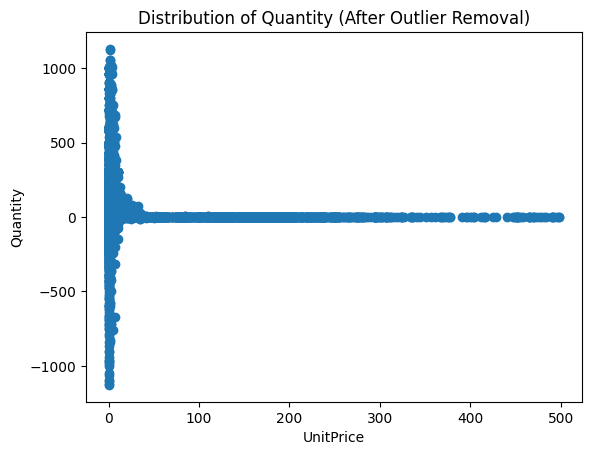

In [ ]:
plt.scatter(df_cleaned['UnitPrice'], df_cleaned['Quantity'])
plt.xlabel('UnitPrice')
plt.ylabel('Quantity')
plt.title('Distribution of Quantity (After Outlier Removal)')
plt.show()

Encoding the dependent Variable Column

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(y)

[36 36 36 ... 13 13 13]


Performing Exploratory Data Analysis (EDA) on the Dataset

# Summary statistics

In [ ]:
numeric_variables = ['Quantity', 'UnitPrice']
summary_stats = df[numeric_variables].describe()
print(summary_stats)

            Quantity      UnitPrice
count  495478.000000  495478.000000
mean        8.605486       4.532422
std       227.588756      99.315438
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.100000
75%        10.000000       4.130000
max     80995.000000   38970.000000


# Time analysis


check the monthly sales analysis

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month

In [ ]:
monthly_sales = df.groupby('Month')['Quantity'].sum()
print("\nMonthly Sales:")
print(monthly_sales)


Monthly Sales:
Month
1     237381
2     225641
3     279843
4     257666
5     306452
6     258522
7     324129
8     319804
9     458490
10    455612
11    642281
12    498008
Name: Quantity, dtype: int64


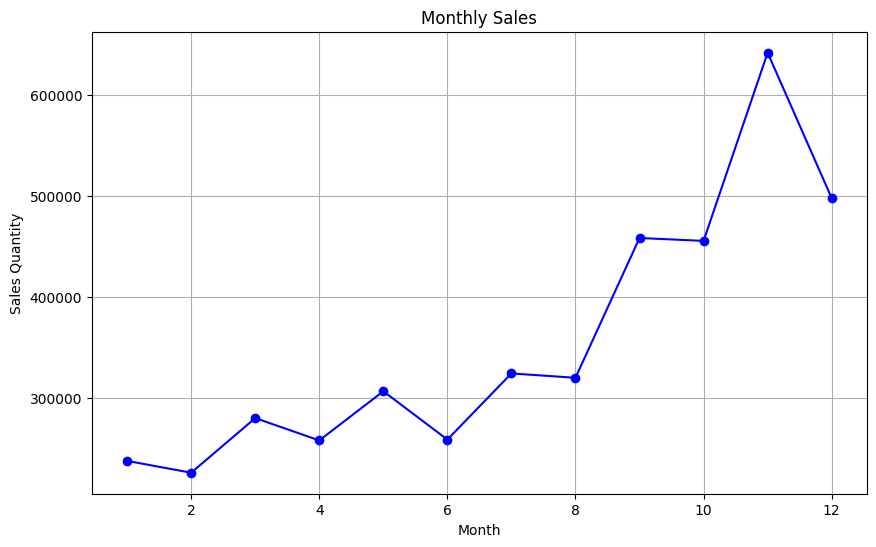

In [ ]:
plt.figure(figsize=(10, 6))
monthly_sales.plot(color='blue', marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Sales Quantity')
plt.title('Monthly Sales')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

Check the Yearly sales analysis

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = df['InvoiceDate'].dt.year

In [ ]:
yearly_sales = df.groupby('Year')['Quantity'].sum()
print("\nYearly Sales:")
print(yearly_sales)


Yearly Sales:
Year
2010     298101
2011    3965728
Name: Quantity, dtype: int64


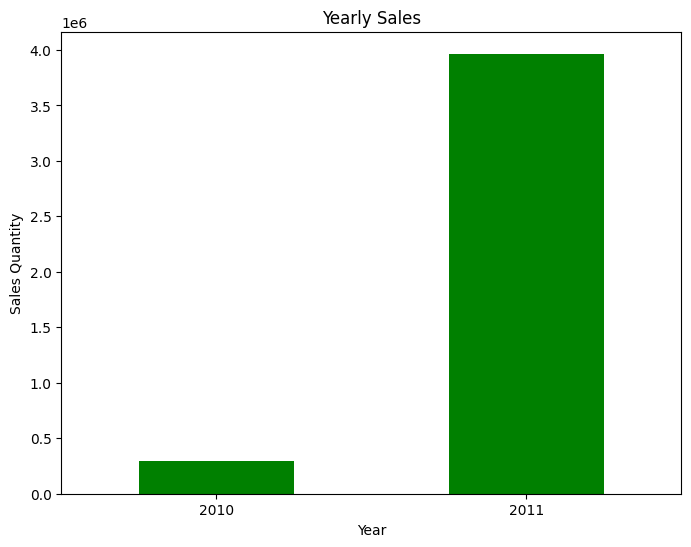

In [ ]:

plt.figure(figsize=(8, 6))
yearly_sales.plot(kind='bar', color='green')
plt.xlabel('Year')
plt.ylabel('Sales Quantity')
plt.title('Yearly Sales')
plt.xticks(rotation=0)
plt.show()


# Sales analysis

In [ ]:
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
total_sales = df['TotalSales'].sum()
print("\nTotal Sales:", total_sales)


Total Sales: 8187806.364000001



# Customer analysis

In [ ]:
unique_customers = df['CustomerID'].nunique()
print("\nNumber of Unique Customers:", unique_customers)


Number of Unique Customers: 3951


# PERFORMING CUSTOMER SEGMENTATION

STARTING WITH QUANTITY AND UNIT PRICE. LET'S STUDY THE BEHAVIOURAL PATTERNS USING DIFFERENT MACHINE LEARNING ALGORITHMS.

#Gaussian Mixture Models (GMM)

#Compute total price and derive the RFM metrics.

In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)
df_recency = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days})

df_freq_monetary = df.groupby('CustomerID').agg({
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'})

df_rfm = pd.DataFrame()

df_rfm['Recency'] = df_recency['InvoiceDate']
df_rfm['Frequency'] = df_freq_monetary['InvoiceNo']
df_rfm['Monetary'] = df_freq_monetary['TotalPrice']


# Normalize the RFM features.

In [ ]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(df_rfm)

#Determine the optimal number of clusters using BIC score.

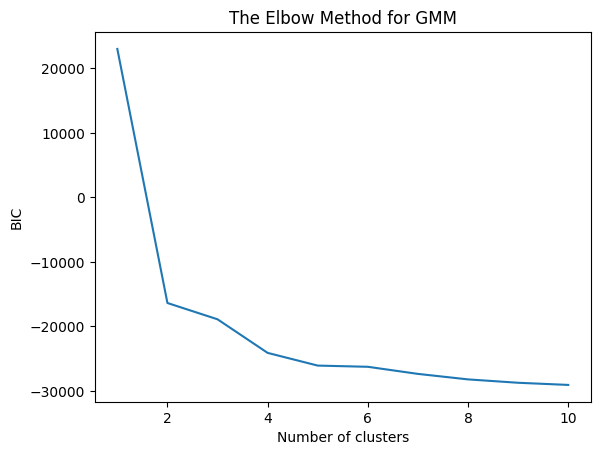

Optimal number of clusters based on BIC score:  10


In [ ]:
bic = []
for n_clusters in range(1, 11):
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(X_normalized)
    bic.append(gmm.bic(X_normalized))

plt.plot(range(1, 11), bic)
plt.title('The Elbow Method for GMM')
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.show()

optimal_clusters = bic.index(min(bic)) + 1
print("Optimal number of clusters based on BIC score: ", optimal_clusters)


#Fit GMM to the data and assign cluster labels.

In [ ]:
gmm = GaussianMixture(n_components= optimal_clusters, random_state=42)
gmm.fit(X_normalized)
labels = gmm.predict(X_normalized)

df_rfm['Cluster_GMM'] = labels

# Apply Gaussian Mixture Model (GMM) to cluster customers
n_clusters = 10  # You can change the number of clusters as per the GMM analysis
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
labels = gmm.fit_predict(X_normalized)

# Calculate average RFM values and size for each cluster

In [ ]:
cluster_summary = df_rfm.groupby('Cluster_GMM').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)

# Print the summary statistics
print(cluster_summary)

            Recency Frequency   Monetary      
               mean      mean       mean count
Cluster_GMM                                   
0              12.8     109.7     1535.3   683
1               1.0  133600.0  1419933.0     1
2             153.4     152.7     3025.2   107
3              61.2      94.2     1588.7   453
4             198.5      43.9      601.7   460
5               4.5     392.0   221960.3     2
6             211.3      12.7      220.5   840
7              13.9     317.1     4890.0   346
8               5.9     923.7    25570.5    63
9              35.8      28.5      468.9   996


#Print the first 5 rows of the DataFrame.

In [ ]:
print(df_rfm['Cluster_GMM'].value_counts().sort_index())

0    683
1      1
2    107
3    453
4    460
5      2
6    840
7    346
8     63
9    996
Name: Cluster_GMM, dtype: int64


#Create a pairplot coloUred by cluster.

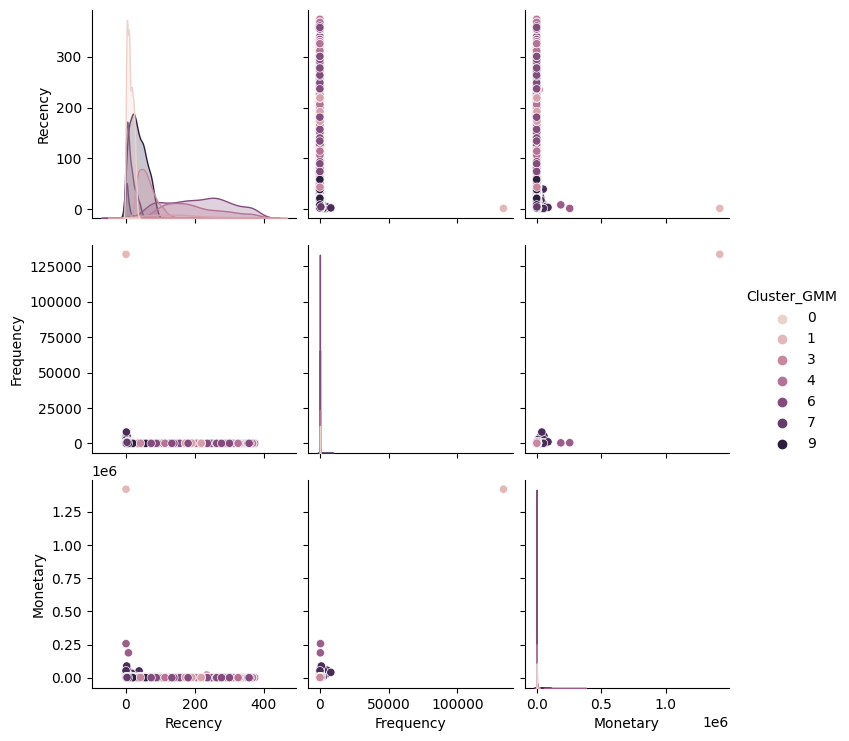

In [ ]:
sns.pairplot(df_rfm, hue='Cluster_GMM')

#Visualize the number of customers in each cluster

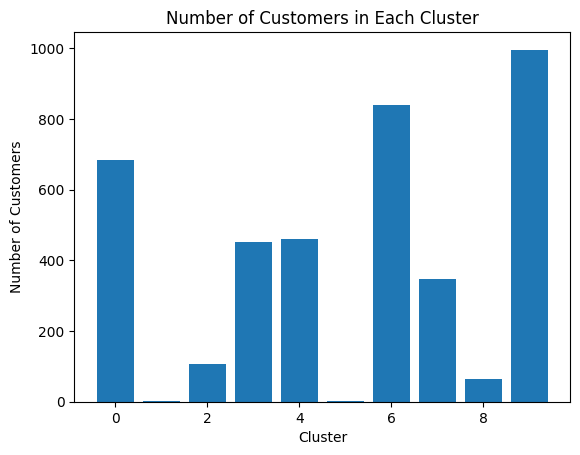

In [ ]:
plt.bar(df_rfm['Cluster_GMM'].value_counts().sort_index().index,
        df_rfm['Cluster_GMM'].value_counts().sort_index().values)
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Number of Customers in Each Cluster')
plt.show()

#Print the number of customers in each cluster

In [ ]:
print(df_rfm['Cluster_GMM'].value_counts().sort_index())

0    683
1      1
2    107
3    453
4    460
5      2
6    840
7    346
8     63
9    996
Name: Cluster_GMM, dtype: int64


In [ ]:
# Evaluate GMM using Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X_normalized, labels)
print("Calinski-Harabasz Index for GMM:", ch_index)

Calinski-Harabasz Index for GMM: 3751.766357522354


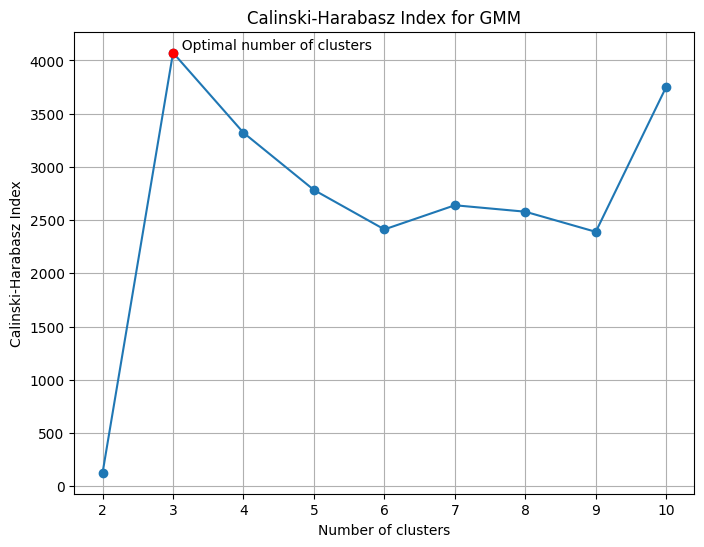

Optimal number of clusters based on Calinski-Harabasz score:  3


In [ ]:
# Determine the optimal number of clusters using Calinski-Harabasz Index
calinski_scores = []
for n_clusters in range(2, 11):
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(X_normalized)
    labels = gmm.predict(X_normalized)
    calinski_index = calinski_harabasz_score(X_normalized, labels)
    calinski_scores.append(calinski_index)

# Find the number of clusters that gives the maximum Calinski-Harabasz score
optimal_clusters_ch = calinski_scores.index(max(calinski_scores)) + 2

# Plot the Calinski-Harabasz Index for different numbers of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), calinski_scores, marker='o')
plt.title('Calinski-Harabasz Index for GMM')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')

# Highlight the point with highest CH index
plt.scatter(optimal_clusters_ch, max(calinski_scores), color='red', zorder=5)
plt.text(optimal_clusters_ch, max(calinski_scores), '  Optimal number of clusters', verticalalignment='bottom')

plt.grid(True)
plt.show()

print("Optimal number of clusters based on Calinski-Harabasz score: ", optimal_clusters_ch)


In [ ]:
# Evaluate GMM using the Davies-Bouldin Index
davies_bouldin_index = davies_bouldin_score(X_normalized, labels)
# Print the results
print("Davies-Bouldin Index for GMM:", davies_bouldin_index)

Davies-Bouldin Index for GMM: 3.256051765538291


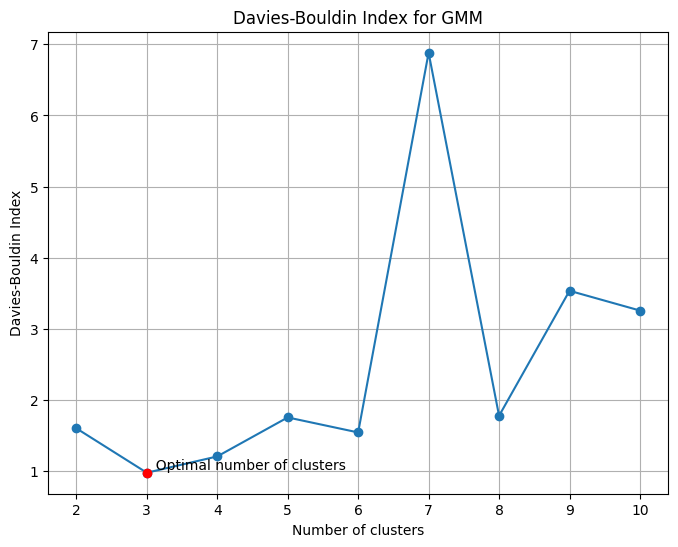

Optimal number of clusters based on Davies-Bouldin score:  3


In [ ]:
# Determine the optimal number of clusters using Davies-Bouldin Index
davies_bouldin_scores = []
for n_clusters in range(2, 11):
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(X_normalized)
    labels = gmm.predict(X_normalized)
    davies_bouldin_index = davies_bouldin_score(X_normalized, labels)
    davies_bouldin_scores.append(davies_bouldin_index)

# Find the number of clusters that gives the minimum Davies-Bouldin score
optimal_clusters_db = davies_bouldin_scores.index(min(davies_bouldin_scores)) + 2

# Plot the Davies-Bouldin Index for different numbers of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Index for GMM')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Index')

# Highlight the point with lowest DB index
plt.scatter(optimal_clusters_db, min(davies_bouldin_scores), color='red', zorder=5)
plt.text(optimal_clusters_db, min(davies_bouldin_scores), '  Optimal number of clusters', verticalalignment='bottom')

plt.grid(True)
plt.show()

print("Optimal number of clusters based on Davies-Bouldin score: ", optimal_clusters_db)


#Self Organized Maps

 Compute total price and derive the RFM metrics.

In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)
df_recency = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days})

df_freq_monetary = df.groupby('CustomerID').agg({
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'})

df_rfm = pd.DataFrame()

df_rfm['Recency'] = df_recency['InvoiceDate']
df_rfm['Frequency'] = df_freq_monetary['InvoiceNo']
df_rfm['Monetary'] = df_freq_monetary['TotalPrice']

#Normalize the RFM features using MinMaxScaler.

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))
X_normalized = scaler.fit_transform(df_rfm)

#Train the SOM and assign cluster labels.

In [ ]:
# Set the SOM grid size
som_size = 5  # This will create a 5x5 grid, resulting in 25 clusters

# Initialize SOM
som = MiniSom(som_size, som_size, X_normalized.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(X_normalized)
som.train_random(X_normalized, 100)  # Train the SOM

labels = []
for i in range(len(X_normalized)):
    w = som.winner(X_normalized[i])
    labels.append(w[0]*som_size + w[1])  # Here w[0]*som_size + w[1] will return the cluster label

# Add the cluster labels to the dataframe
df_rfm['Cluster_SOM'] = labels

# Print the first 5 rows of the DataFrame
print(df_rfm.head())


            Recency  Frequency  Monetary  Cluster_SOM
CustomerID                                           
12346.0         326          2      0.00           20
12747.0           2        103   4196.01            0
12748.0           1       4642  29072.10            0
12749.0           4        231   3868.20            0
12820.0           3         59    942.34            0


In [ ]:
cluster_summary = df_rfm.groupby('Cluster_SOM').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)

# Print the summary statistics
print(cluster_summary)

            Recency Frequency Monetary      
               mean      mean     mean count
Cluster_SOM                                 
0               6.1     359.2   5999.1   855
1              19.6     104.6   1684.3   516
2              71.8      51.8    964.0   146
3             119.6      47.4    773.7    62
4             222.1      26.6    520.1   296
5              31.3      98.0   1377.0   360
6              46.3      69.4   1270.9   370
7             134.8      28.8    561.3    28
8             110.0      17.3    302.8     3
9              87.5      49.7   1141.2    43
10            113.0      42.0   1076.7    24
11            149.8      45.3    555.2   132
12             95.6      76.1   1159.5    23
13             79.2      54.1    865.3    87
14             91.6      41.9   1015.3    31
15            171.6      42.3    571.1   109
16            100.3      52.7   1117.5    39
17             84.7      48.1    998.8    23
18             82.5     148.5   2622.5     2
19        

<Axes: xlabel='Cluster_SOM', ylabel='Count'>

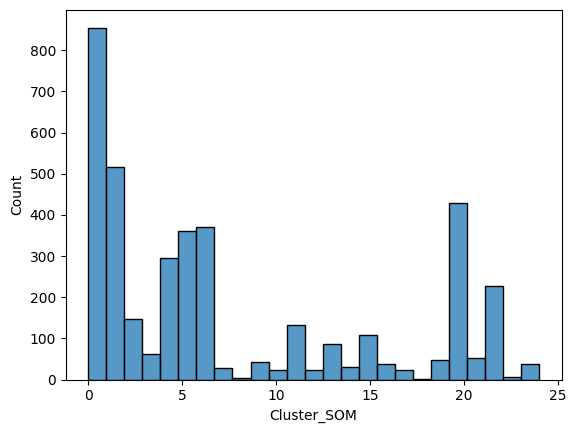

In [ ]:
sns.histplot(df_rfm['Cluster_SOM'], bins=som_size*som_size, kde=False)

In [ ]:
print(df_rfm['Cluster_SOM'].value_counts().sort_index())

0     855
1     516
2     146
3      62
4     296
5     360
6     370
7      28
8       3
9      43
10     24
11    132
12     23
13     87
14     31
15    109
16     39
17     23
18      2
19     47
20    429
21     52
22    228
23      7
24     39
Name: Cluster_SOM, dtype: int64


 #Print the first 5 rows of the DataFrame.

In [ ]:
print(df_rfm.head())

            Recency  Frequency  Monetary  Cluster_SOM
CustomerID                                           
12346.0         326          2      0.00           20
12747.0           2        103   4196.01            0
12748.0           1       4642  29072.10            0
12749.0           4        231   3868.20            0
12820.0           3         59    942.34            0


#Calculate the U-Matrix

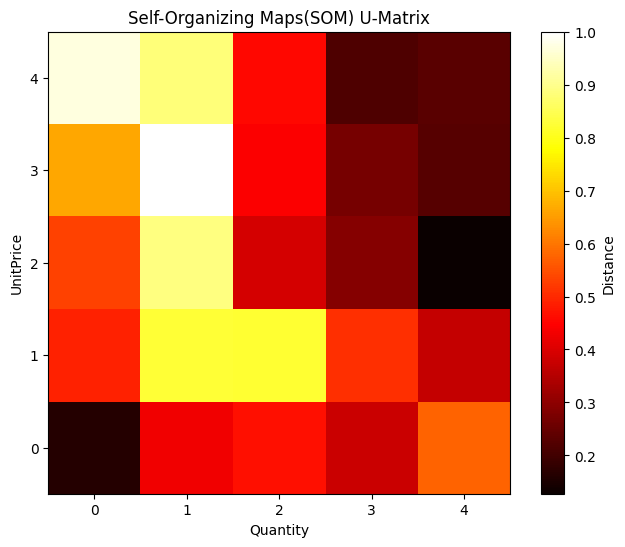

In [ ]:
umatrix = som.distance_map()

# Plot the U-Matrix
plt.figure(figsize=(8, 6))
plt.imshow(umatrix, cmap='hot', origin='lower')
plt.colorbar(label='Distance')
plt.title('Self-Organizing Maps(SOM) U-Matrix')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()

In [ ]:
# Evaluate SOM using Davies-Bouldin Index
davies_bouldin_score = davies_bouldin_score(X_normalized, df_rfm['Cluster_SOM'])
print("Davies-Bouldin Index for SOM:", davies_bouldin_score)

Davies-Bouldin Index for SOM: 0.5090602537791098


In [ ]:
# Evaluate SOM using Calinski-Harabasz Index
calinski_score = calinski_harabasz_score(X_normalized, df_rfm['Cluster_SOM'])
print("Calinski-Harabasz Index for SOM:", calinski_score)

Calinski-Harabasz Index for SOM: 5882.538868024863


#Perform Demand forecasting on each cluster on the best performing model.

In [ ]:
import logging

warnings.simplefilter(action='ignore')


#Facebook Prophet Model

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/u5bcniql.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/kprru86r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6137', 'data', 'file=/tmp/tmp967ds4y3/u5bcniql.json', 'init=/tmp/tmp967ds4y3/kprru86r.json', 'output', 'file=/tmp/tmp967ds4y3/prophet_modelpwrxfrju/prophet_model-20230824012720.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:27:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:27:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cm

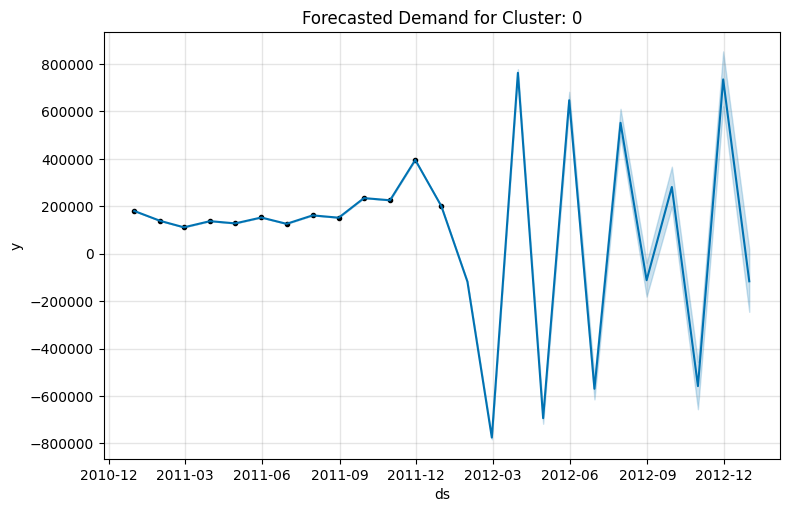

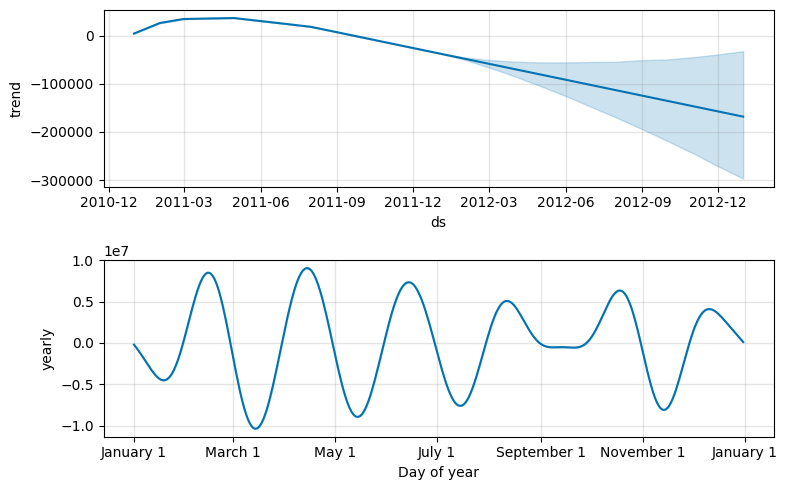

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/azzw9e4s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/57u9bqzs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83564', 'data', 'file=/tmp/tmp967ds4y3/azzw9e4s.json', 'init=/tmp/tmp967ds4y3/57u9bqzs.json', 'output', 'file=/tmp/tmp967ds4y3/prophet_modela0cuibim/prophet_model-20230824012727.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:27:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Cluster: 0
Mean Absolute Error: 2.8086010958068073
Root Mean Squared Error: 2.918609168815322


01:27:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


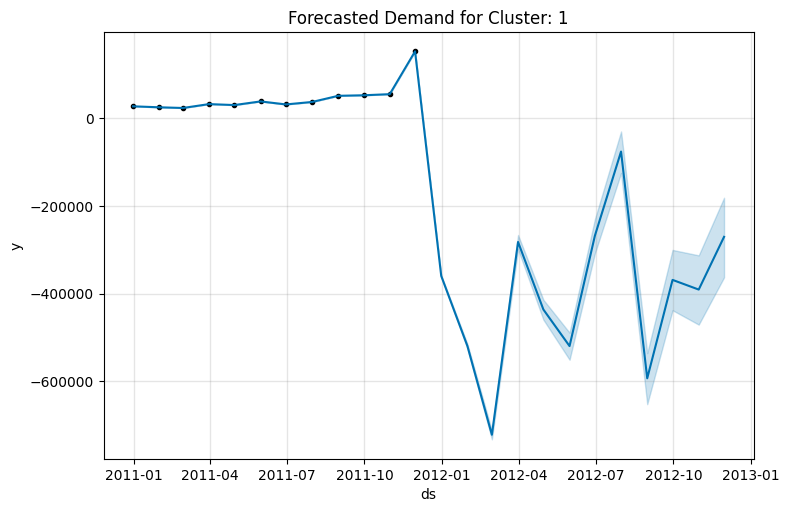

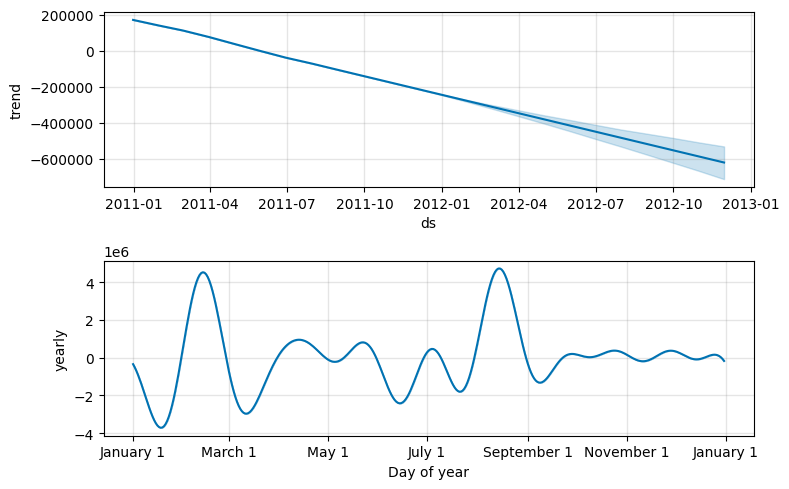

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/gkr1g6rg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/hlc4pdao.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76120', 'data', 'file=/tmp/tmp967ds4y3/gkr1g6rg.json', 'init=/tmp/tmp967ds4y3/hlc4pdao.json', 'output', 'file=/tmp/tmp967ds4y3/prophet_model88xciurf/prophet_model-20230824012733.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:27:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:27:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

Cluster: 1
Mean Absolute Error: 1.4694201834499836
Root Mean Squared Error: 1.5503730893861405


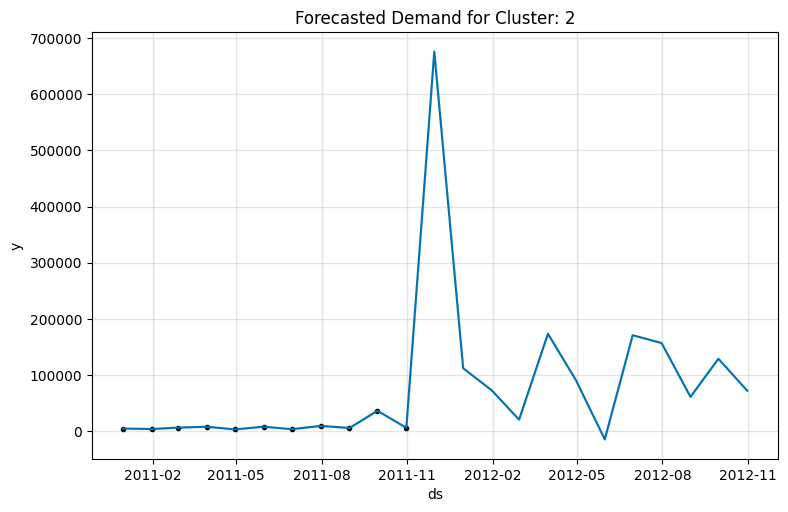

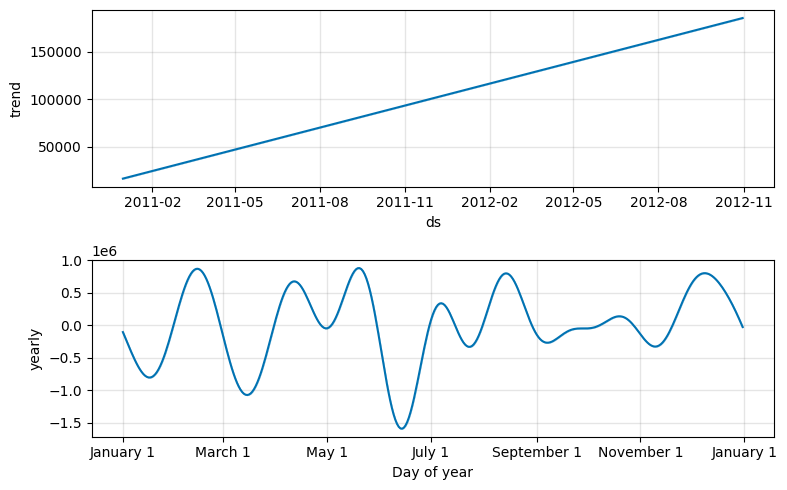

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/_cgh36ku.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/_az_pt6o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14630', 'data', 'file=/tmp/tmp967ds4y3/_cgh36ku.json', 'init=/tmp/tmp967ds4y3/_az_pt6o.json', 'output', 'file=/tmp/tmp967ds4y3/prophet_modelg925n3af/prophet_model-20230824012734.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:27:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:27:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

Cluster: 2
Mean Absolute Error: 0.1486564561831377
Root Mean Squared Error: 0.242570870377757


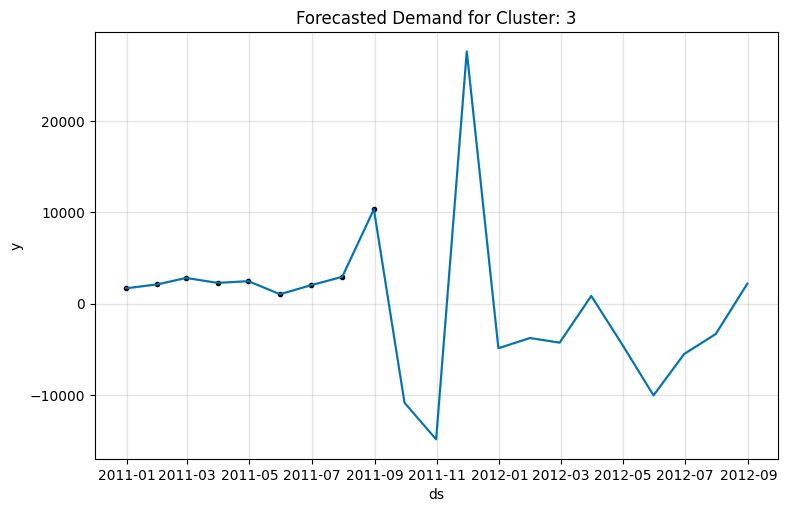

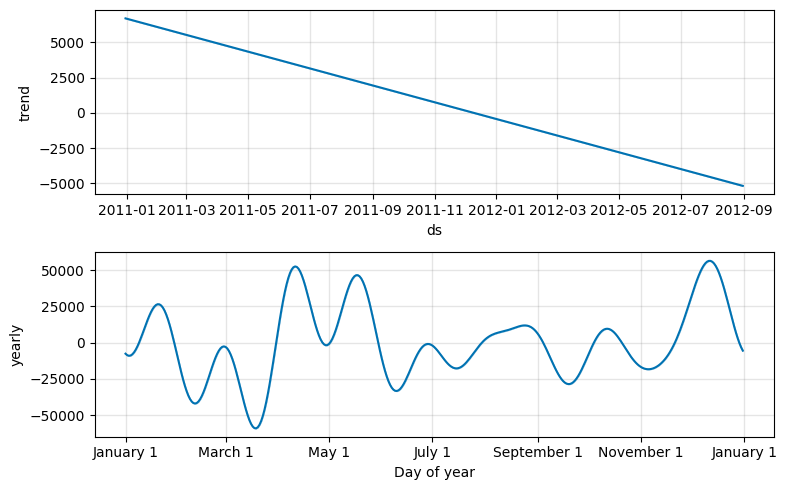

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 4.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/buqtm34z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/4y_itc6l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90039', 'data', 'file=/tmp/tmp967ds4y3/buqtm34z.json', 'init=/tmp/tmp967ds4y3/4y_itc6l.json', 'output', 'file=/tmp/tmp967ds4y3/prophet_model9w3ueuo_/prophet_model-20230824012735.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:27:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Cluster: 3
Mean Absolute Error: 0.09098166369676619
Root Mean Squared Error: 0.10054393025075796


01:27:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


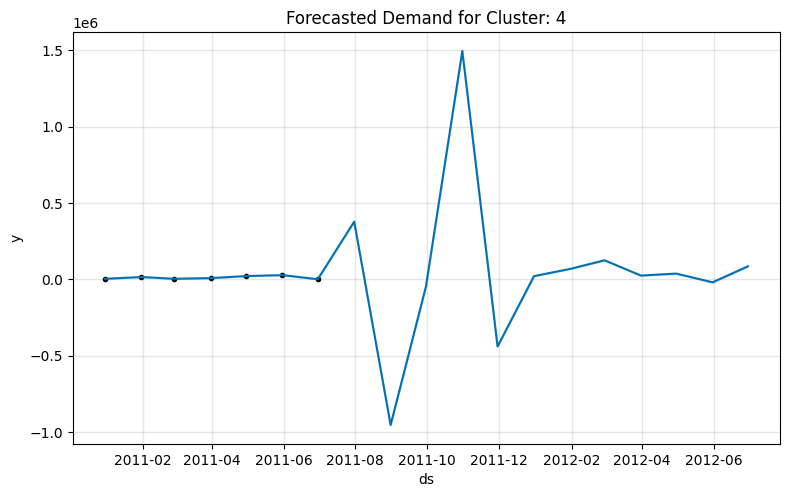

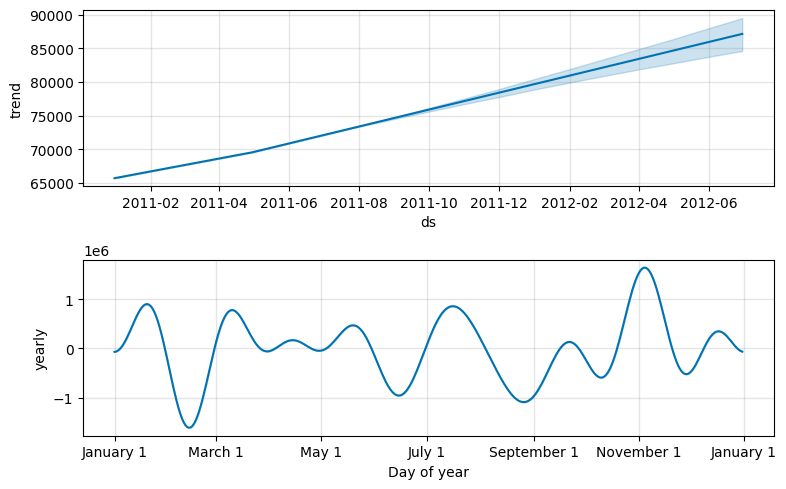

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/9l52eebb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/_wesv07c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93389', 'data', 'file=/tmp/tmp967ds4y3/9l52eebb.json', 'init=/tmp/tmp967ds4y3/_wesv07c.json', 'output', 'file=/tmp/tmp967ds4y3/prophet_modelgnypgohp/prophet_model-20230824012742.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:27:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Cluster: 4
Mean Absolute Error: 0.3945202534123382
Root Mean Squared Error: 0.4537581631736603


01:27:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


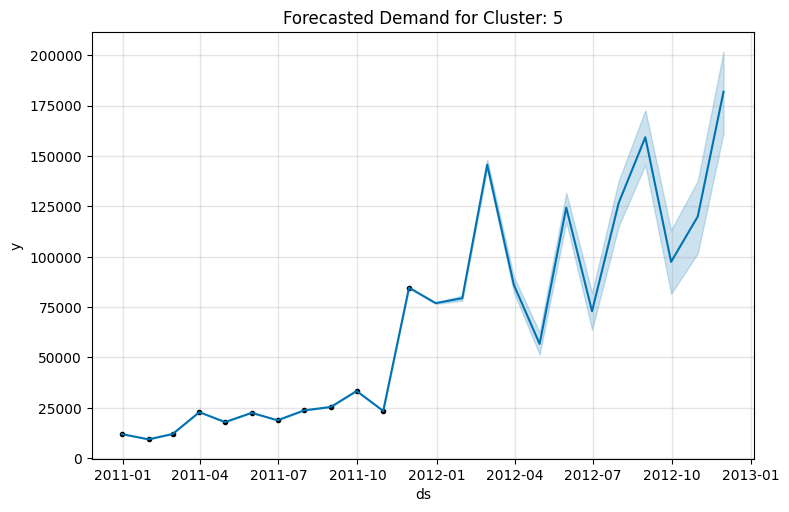

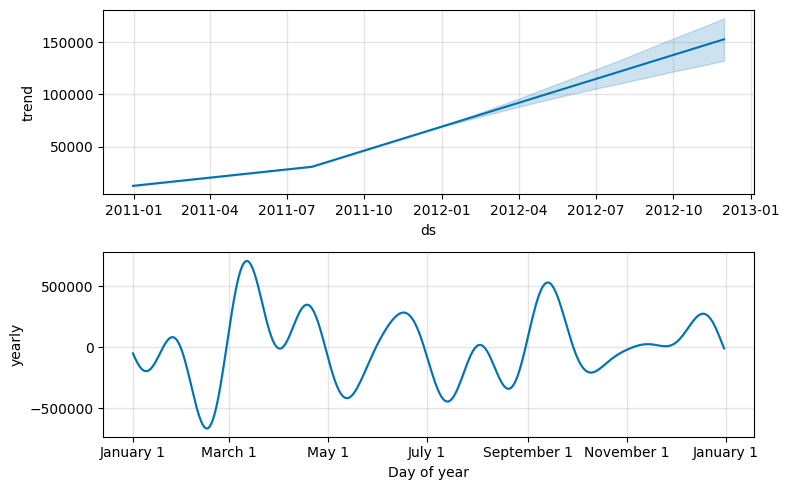

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/ylhbi1fv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/hxk2v4h9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67542', 'data', 'file=/tmp/tmp967ds4y3/ylhbi1fv.json', 'init=/tmp/tmp967ds4y3/hxk2v4h9.json', 'output', 'file=/tmp/tmp967ds4y3/prophet_modelxk79w1j4/prophet_model-20230824012745.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:27:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Cluster: 5
Mean Absolute Error: 0.523020182949646
Root Mean Squared Error: 0.6103831281054366


01:27:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


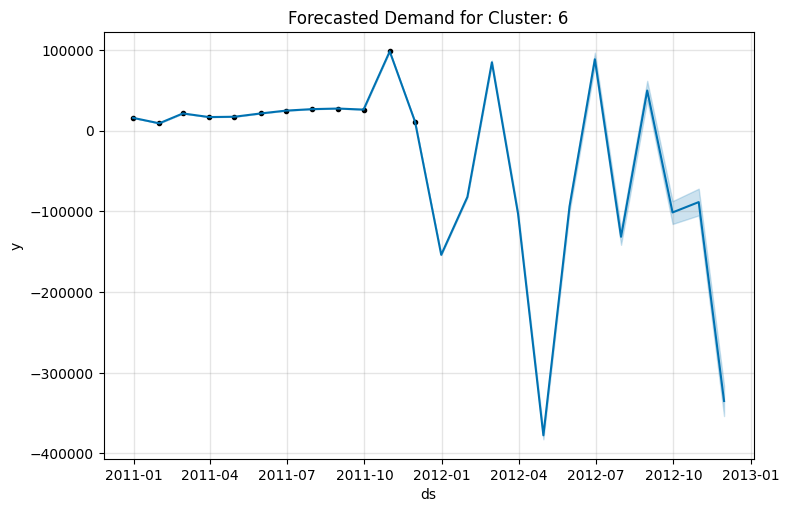

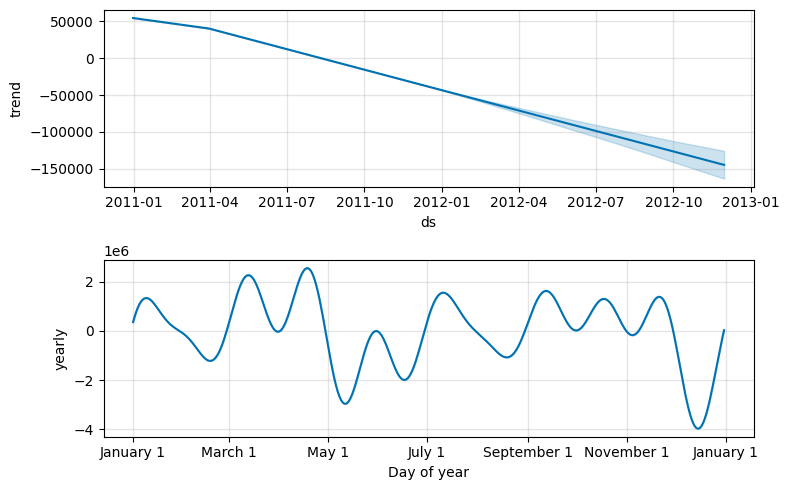

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 4.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/srgvh2fz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/audilulv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75467', 'data', 'file=/tmp/tmp967ds4y3/srgvh2fz.json', 'init=/tmp/tmp967ds4y3/audilulv.json', 'output', 'file=/tmp/tmp967ds4y3/prophet_modelzvcfu8g8/prophet_model-20230824012747.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:27:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Cluster: 6
Mean Absolute Error: 0.45228762772361125
Root Mean Squared Error: 0.534670406796077


01:27:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


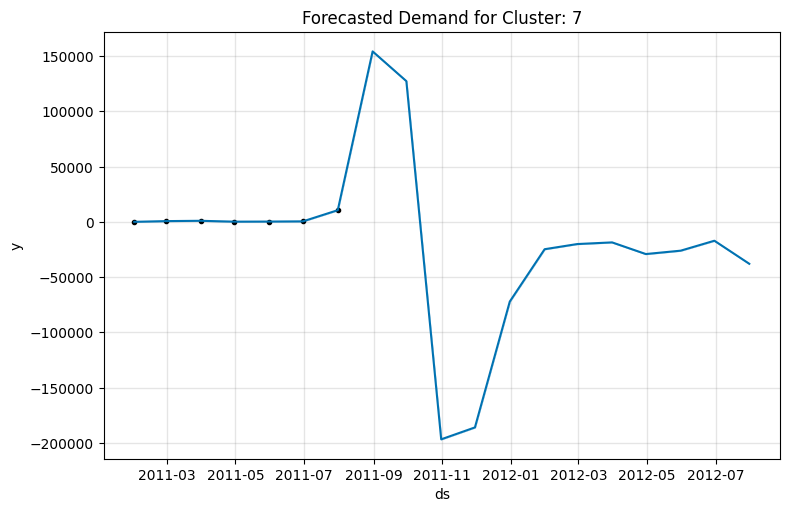

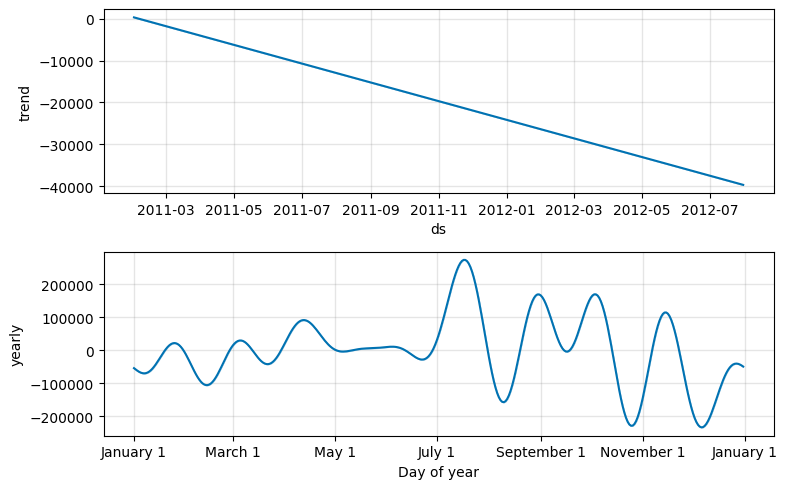

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 4.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/nr7c48a3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/868bglf5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30811', 'data', 'file=/tmp/tmp967ds4y3/nr7c48a3.json', 'init=/tmp/tmp967ds4y3/868bglf5.json', 'output', 'file=/tmp/tmp967ds4y3/prophet_modelrtknpajw/prophet_model-20230824012749.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:27:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Cluster: 7
Mean Absolute Error: 0.11914609600808035
Root Mean Squared Error: 0.12134835699594386


01:27:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


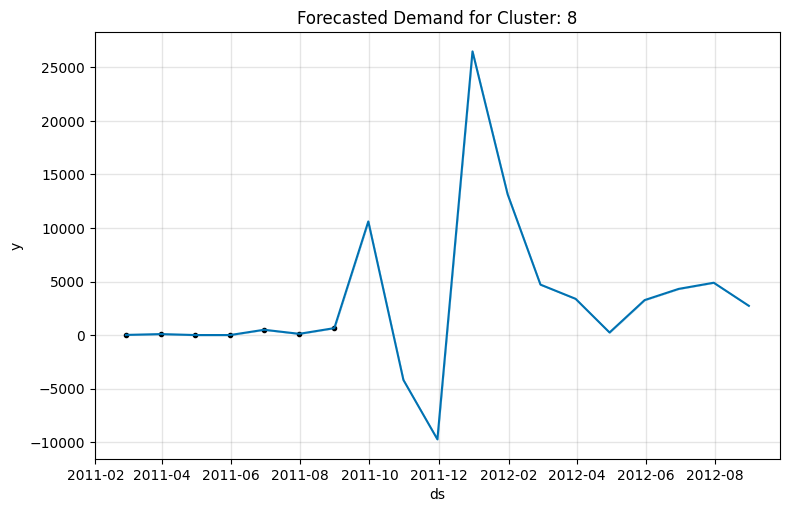

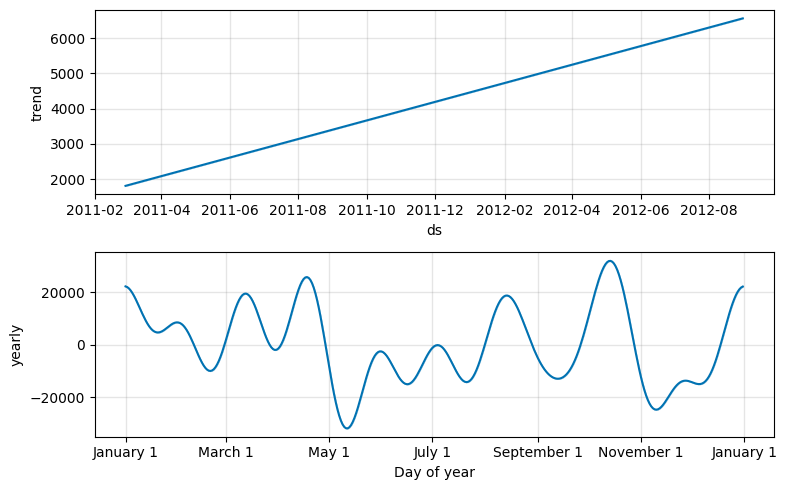

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/4pj_i73f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/lhfmp0za.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20303', 'data', 'file=/tmp/tmp967ds4y3/4pj_i73f.json', 'init=/tmp/tmp967ds4y3/lhfmp0za.json', 'output', 'file=/tmp/tmp967ds4y3/prophet_modelfg8gknsg/prophet_model-20230824012753.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:27:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Cluster: 8
Mean Absolute Error: 0.021514307253028164
Root Mean Squared Error: 0.028647493875637642


01:27:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


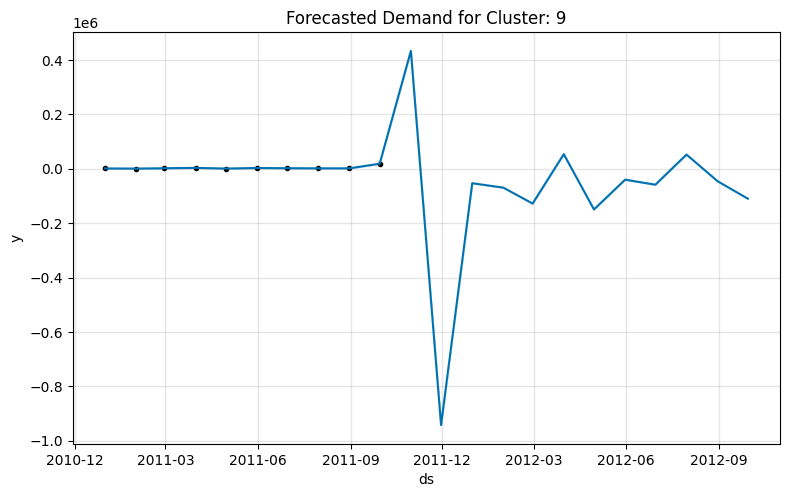

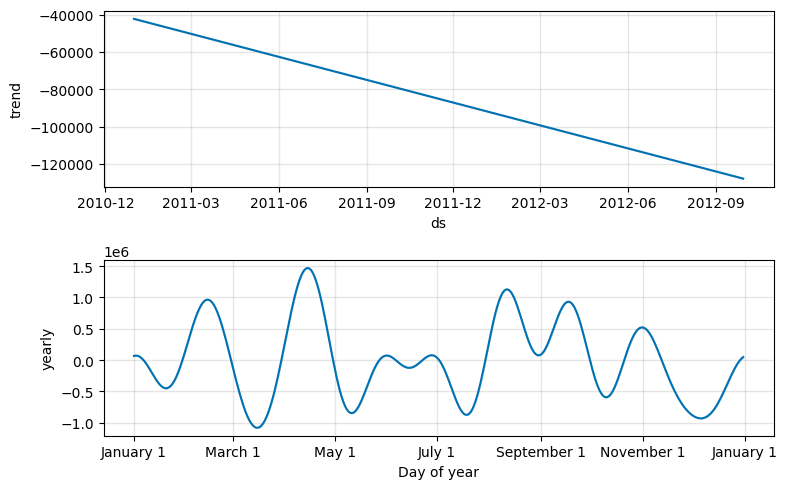

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/5uf5qvbk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/hui14wda.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20730', 'data', 'file=/tmp/tmp967ds4y3/5uf5qvbk.json', 'init=/tmp/tmp967ds4y3/hui14wda.json', 'output', 'file=/tmp/tmp967ds4y3/prophet_modelh7z9v3da/prophet_model-20230824012754.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:27:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Cluster: 9
Mean Absolute Error: 0.34460276098252507
Root Mean Squared Error: 0.3476698985847061


01:27:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


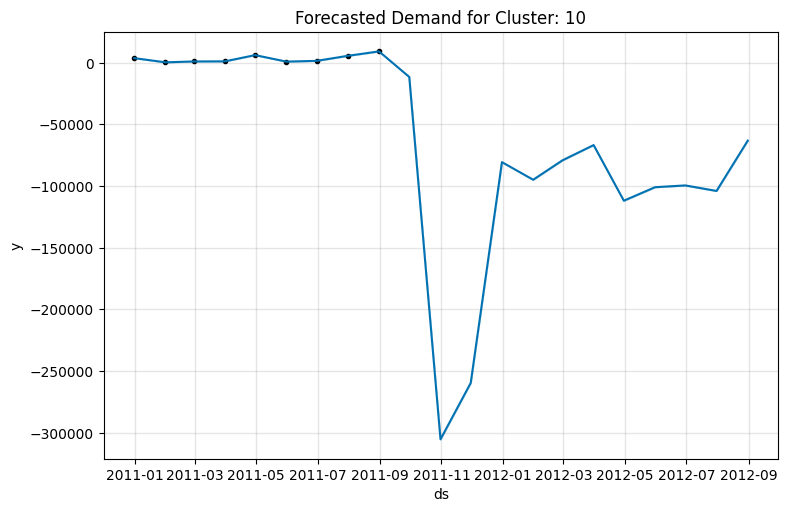

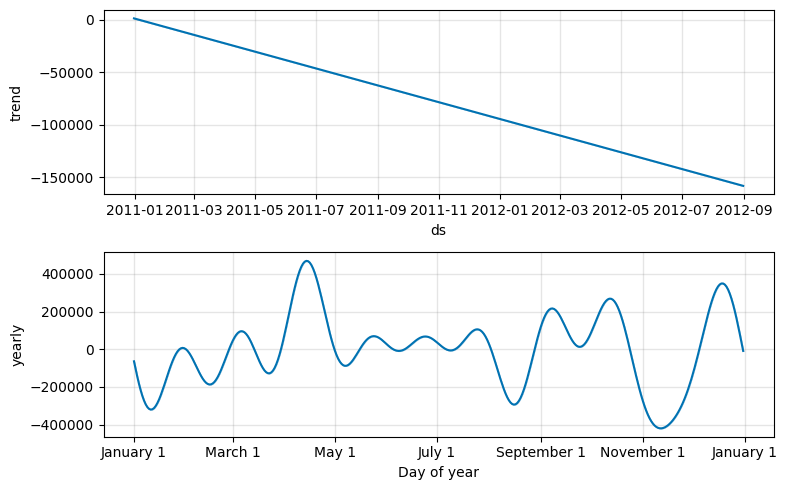

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/vhh4pehx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/ymv_qbsm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8680', 'data', 'file=/tmp/tmp967ds4y3/vhh4pehx.json', 'init=/tmp/tmp967ds4y3/ymv_qbsm.json', 'output', 'file=/tmp/tmp967ds4y3/prophet_model53n5j9aa/prophet_model-20230824012755.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:27:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Cluster: 10
Mean Absolute Error: 0.2552365826086316
Root Mean Squared Error: 0.2764360213786624


01:27:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


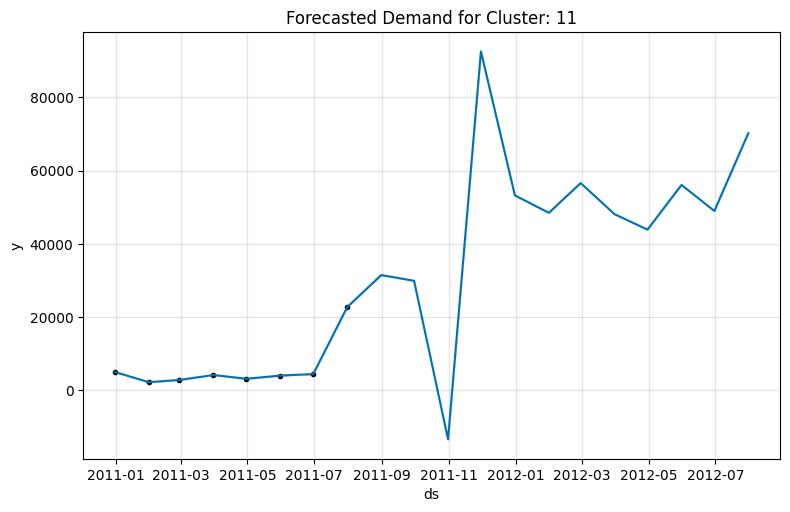

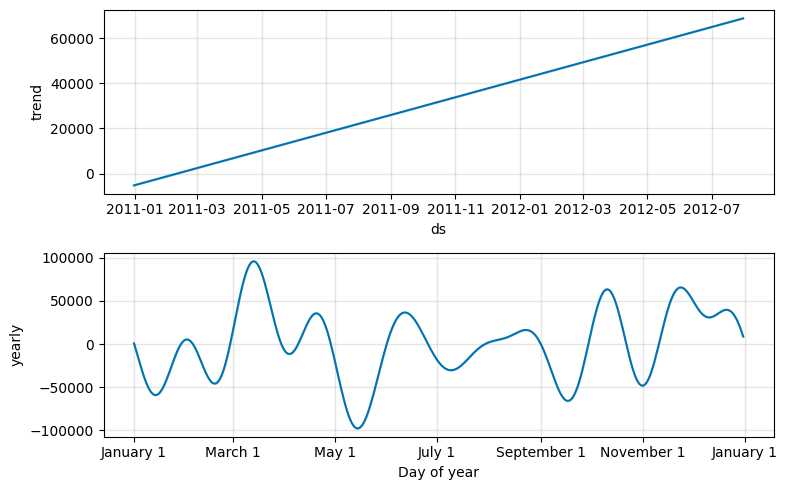

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/d1ovpptc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/0phryc5u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41112', 'data', 'file=/tmp/tmp967ds4y3/d1ovpptc.json', 'init=/tmp/tmp967ds4y3/0phryc5u.json', 'output', 'file=/tmp/tmp967ds4y3/prophet_model7qz5k109/prophet_model-20230824012756.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:27:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Cluster: 11
Mean Absolute Error: 0.04338039964750351
Root Mean Squared Error: 0.04373850665148092


01:27:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


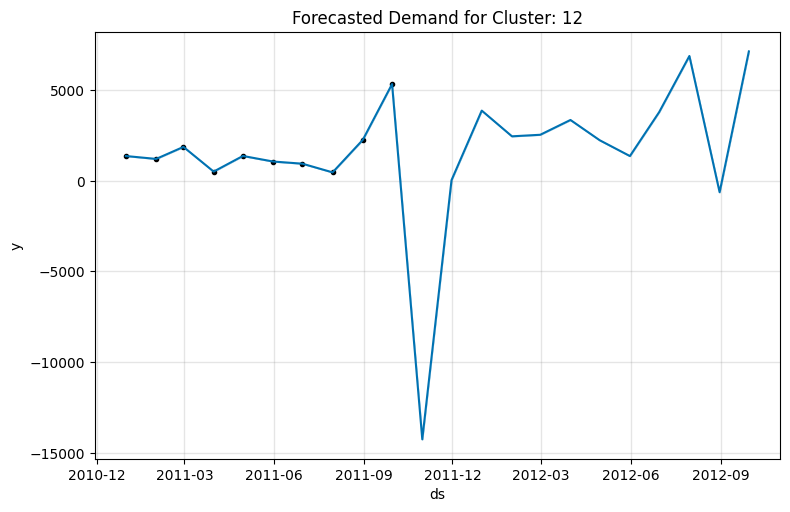

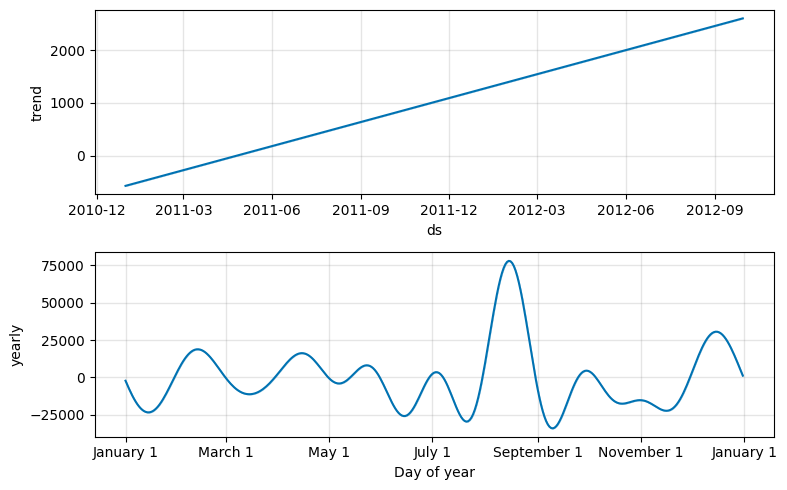

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/a_ee31c0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/fc9q6s38.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57812', 'data', 'file=/tmp/tmp967ds4y3/a_ee31c0.json', 'init=/tmp/tmp967ds4y3/fc9q6s38.json', 'output', 'file=/tmp/tmp967ds4y3/prophet_modelnkh53_ts/prophet_model-20230824012757.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:27:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Cluster: 12
Mean Absolute Error: 0.014944617845230823
Root Mean Squared Error: 0.01882934232229544


01:27:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


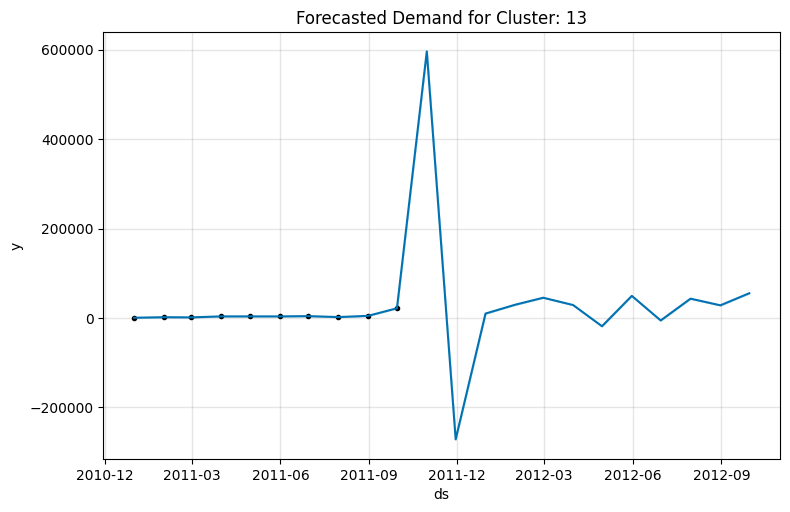

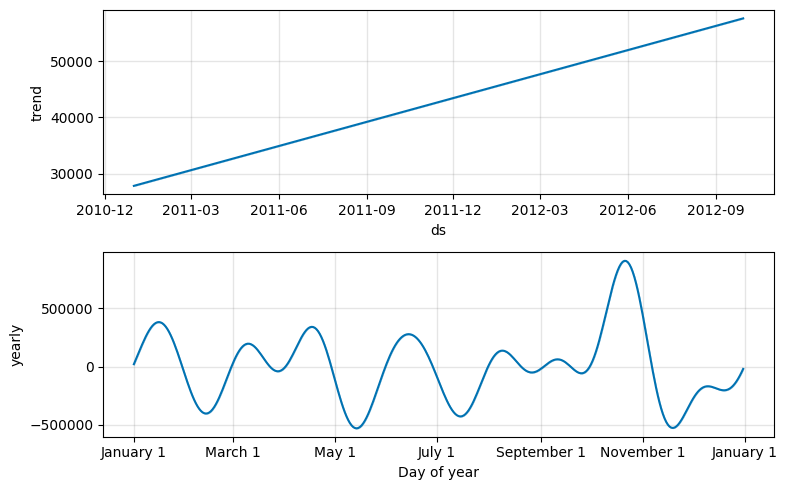

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/_glb47f6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/rrzv28ha.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95384', 'data', 'file=/tmp/tmp967ds4y3/_glb47f6.json', 'init=/tmp/tmp967ds4y3/rrzv28ha.json', 'output', 'file=/tmp/tmp967ds4y3/prophet_model1x8ro8uh/prophet_model-20230824012758.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:27:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Cluster: 13
Mean Absolute Error: 0.09972786535217892
Root Mean Squared Error: 0.12082197111844475


01:27:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


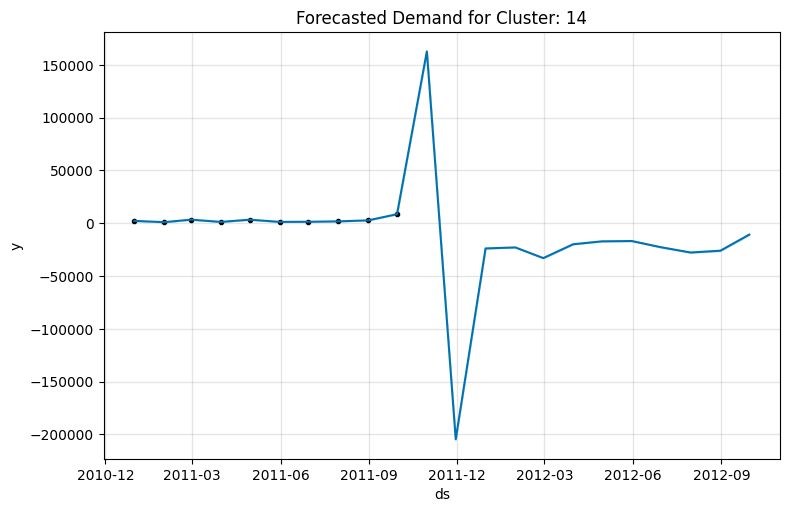

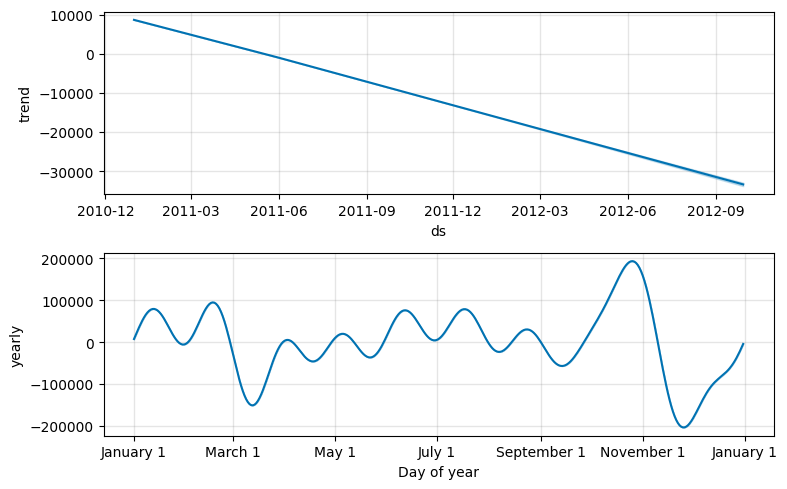

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/shoypuq5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/yog36ebn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53568', 'data', 'file=/tmp/tmp967ds4y3/shoypuq5.json', 'init=/tmp/tmp967ds4y3/yog36ebn.json', 'output', 'file=/tmp/tmp967ds4y3/prophet_modelz29jgny5/prophet_model-20230824012759.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:27:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:27:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

Cluster: 14
Mean Absolute Error: 0.02139121649770459
Root Mean Squared Error: 0.021698239202943934


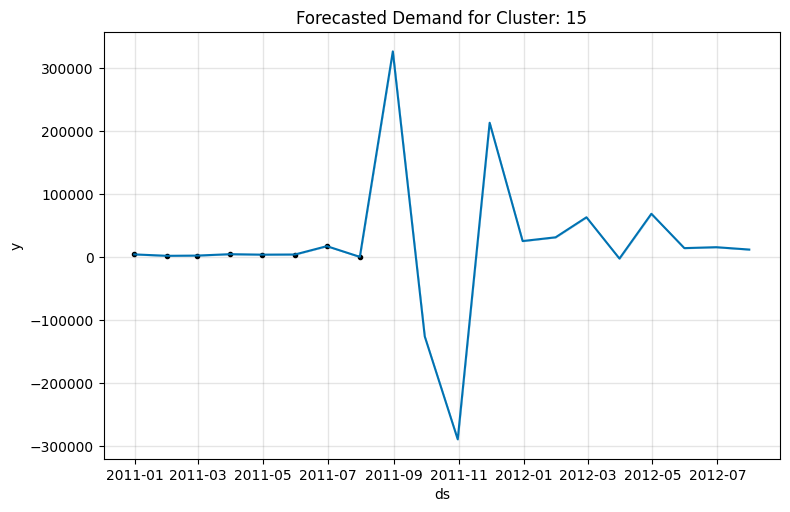

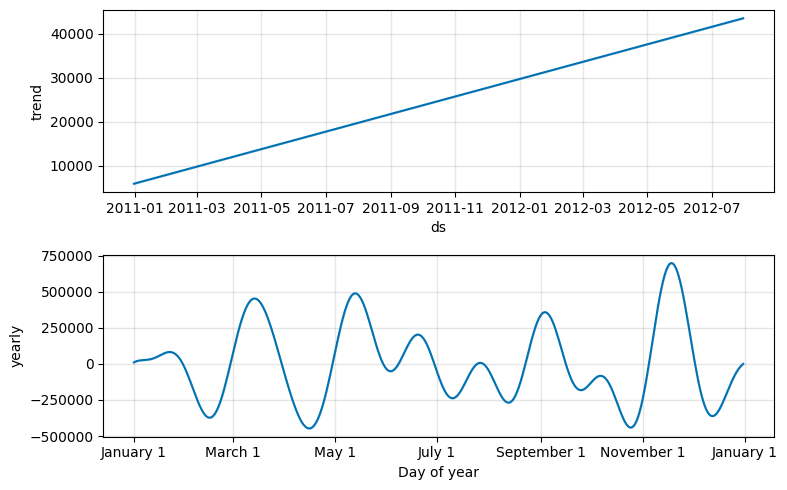

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/ts5f7yji.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/cxovklor.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50695', 'data', 'file=/tmp/tmp967ds4y3/ts5f7yji.json', 'init=/tmp/tmp967ds4y3/cxovklor.json', 'output', 'file=/tmp/tmp967ds4y3/prophet_modelqceud_hy/prophet_model-20230824012800.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:28:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Cluster: 15
Mean Absolute Error: 0.19891108591036755
Root Mean Squared Error: 0.20747814618112936


01:28:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


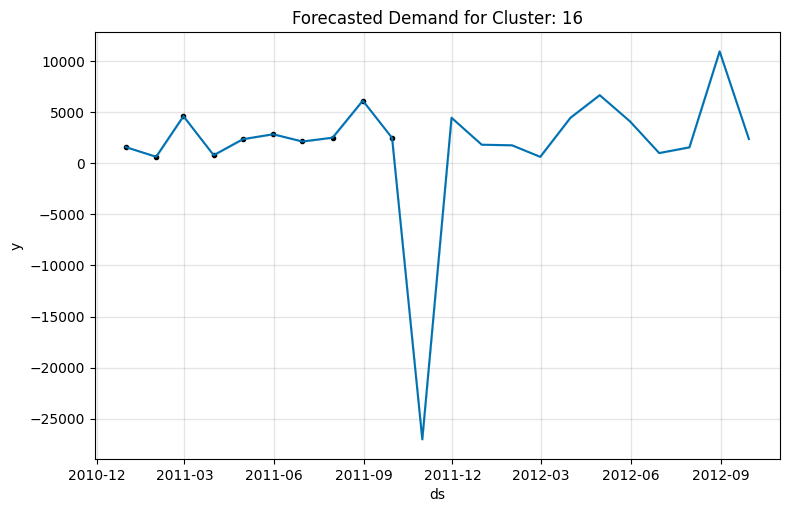

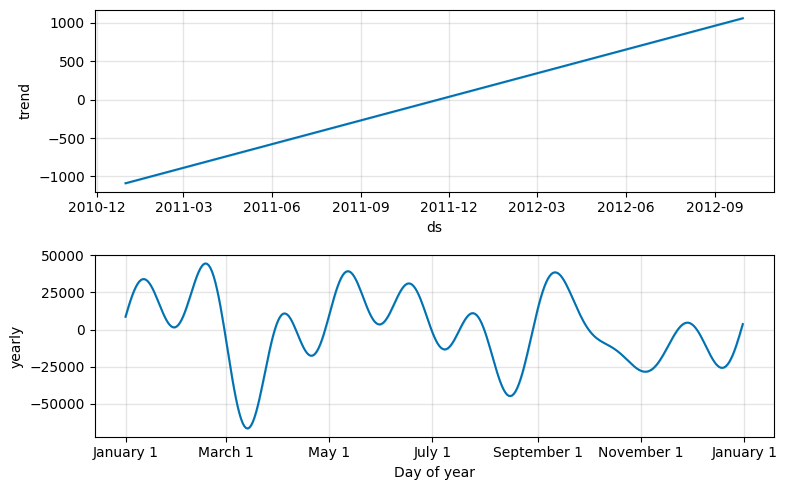

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/uzx8w9sy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/zhc92x6h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74047', 'data', 'file=/tmp/tmp967ds4y3/uzx8w9sy.json', 'init=/tmp/tmp967ds4y3/zhc92x6h.json', 'output', 'file=/tmp/tmp967ds4y3/prophet_modelhx3a7y99/prophet_model-20230824012801.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:28:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Cluster: 16
Mean Absolute Error: 0.04973987033804406
Root Mean Squared Error: 0.049785404912533984


01:28:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


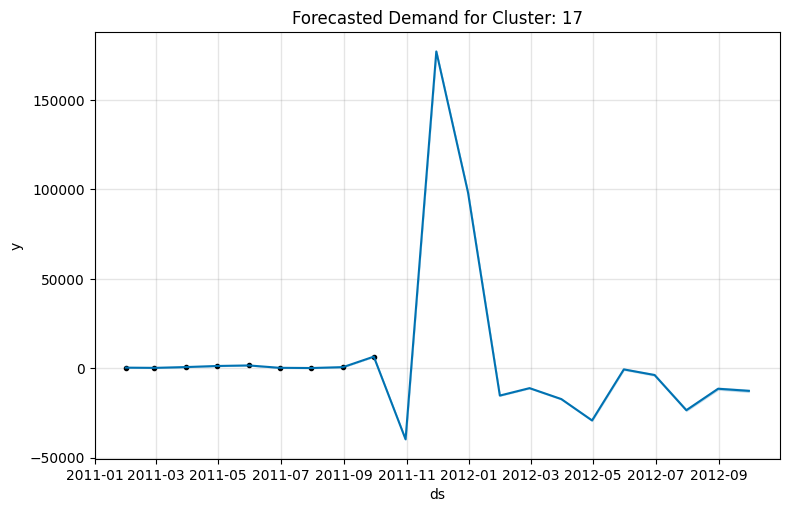

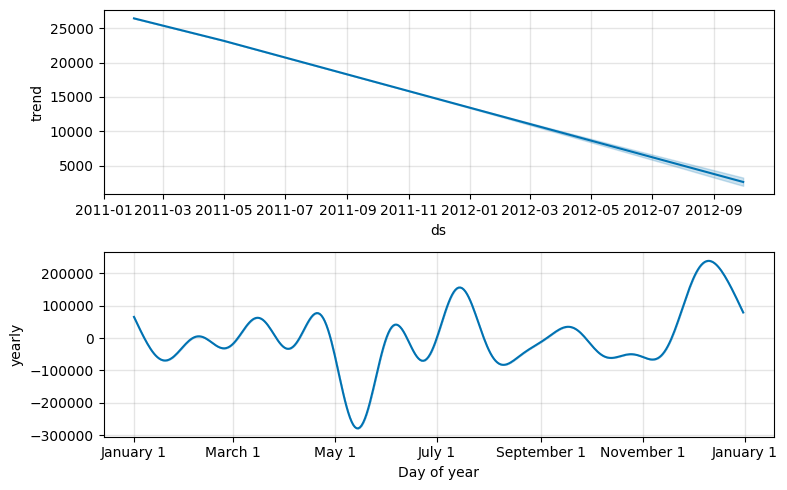

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/mhqw11ir.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/c5bqr4ao.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69874', 'data', 'file=/tmp/tmp967ds4y3/mhqw11ir.json', 'init=/tmp/tmp967ds4y3/c5bqr4ao.json', 'output', 'file=/tmp/tmp967ds4y3/prophet_modelr4lpxzln/prophet_model-20230824012804.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:28:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:28:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

Cluster: 17
Mean Absolute Error: 0.009424411080544814
Root Mean Squared Error: 0.011981213022220001


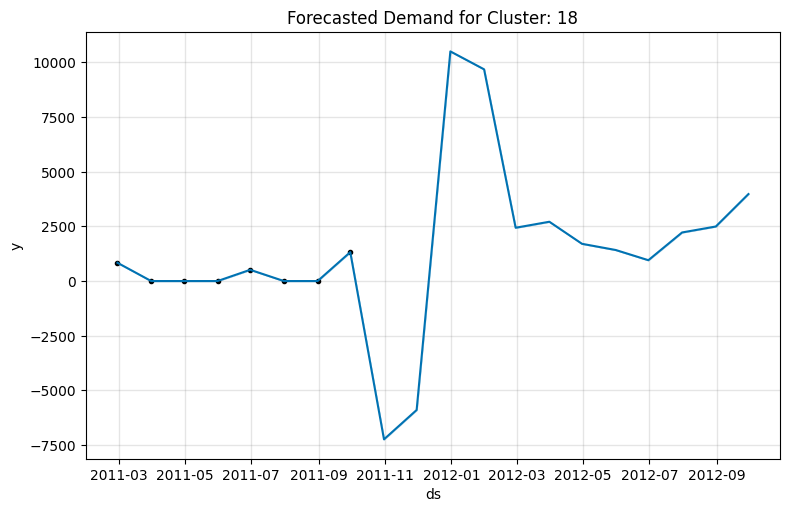

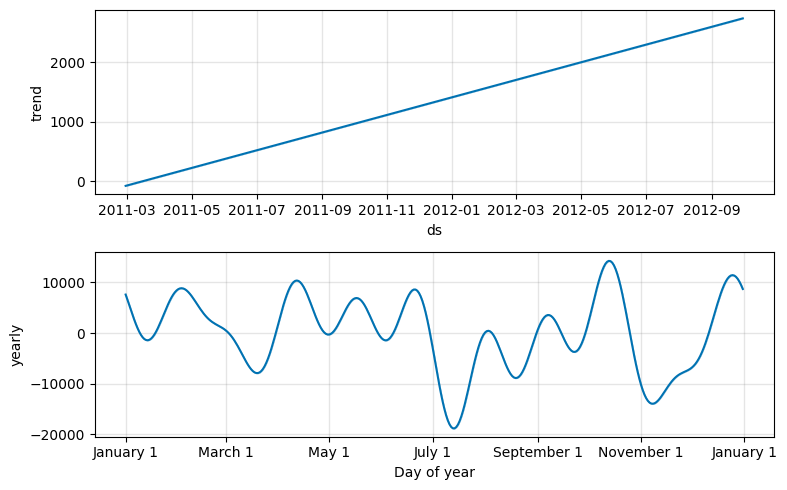

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/z6r8zxin.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/balx8pqs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66235', 'data', 'file=/tmp/tmp967ds4y3/z6r8zxin.json', 'init=/tmp/tmp967ds4y3/balx8pqs.json', 'output', 'file=/tmp/tmp967ds4y3/prophet_modelqyu7me09/prophet_model-20230824012805.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:28:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Cluster: 18
Mean Absolute Error: 0.00711038940431763
Root Mean Squared Error: 0.009967299647975165


01:28:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


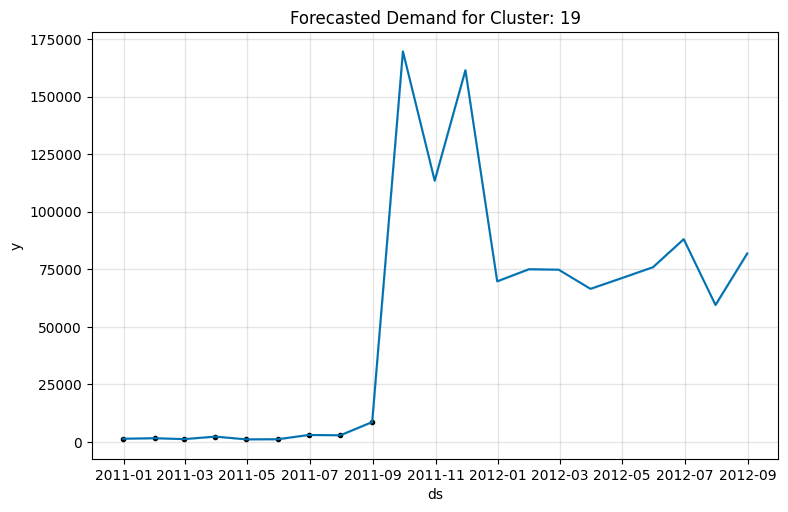

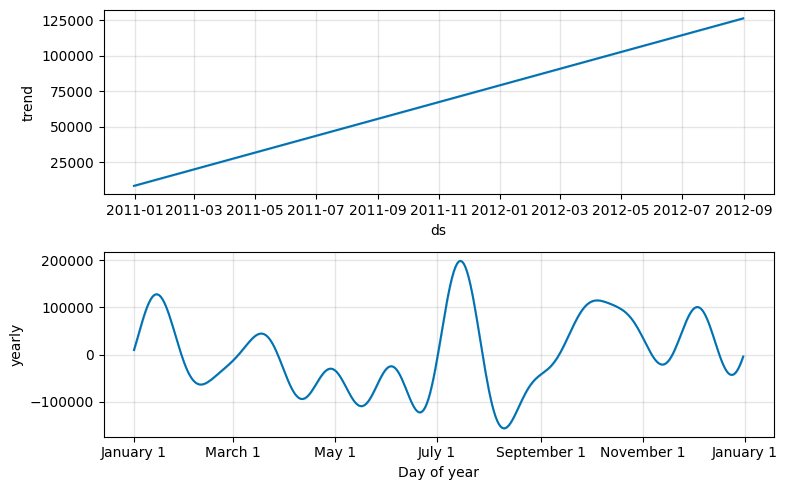

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 2.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/0tog083l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/vtbvz3pa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57592', 'data', 'file=/tmp/tmp967ds4y3/0tog083l.json', 'init=/tmp/tmp967ds4y3/vtbvz3pa.json', 'output', 'file=/tmp/tmp967ds4y3/prophet_model6287vh8x/prophet_model-20230824012807.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:28:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:28:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

Cluster: 19
Mean Absolute Error: 0.07123099938689847
Root Mean Squared Error: 0.0812384137247488


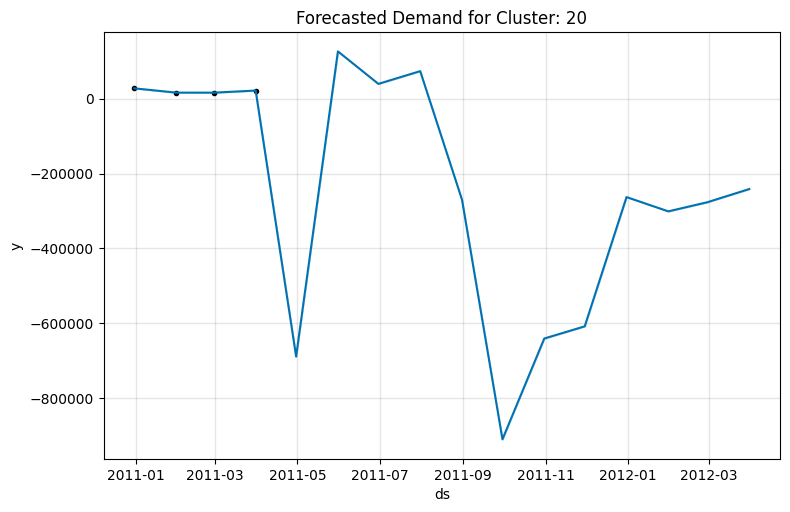

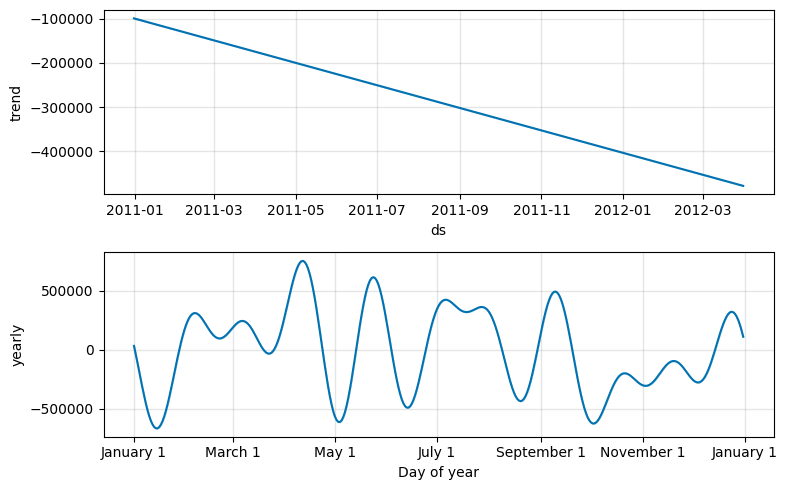

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 4.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/vy9ftfwl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/1rjzx5n_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89581', 'data', 'file=/tmp/tmp967ds4y3/vy9ftfwl.json', 'init=/tmp/tmp967ds4y3/1rjzx5n_.json', 'output', 'file=/tmp/tmp967ds4y3/prophet_modelr6vy7iz_/prophet_model-20230824012808.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:28:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:28:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

Cluster: 20
Mean Absolute Error: 0.17051575344521552
Root Mean Squared Error: 0.17051575344521552


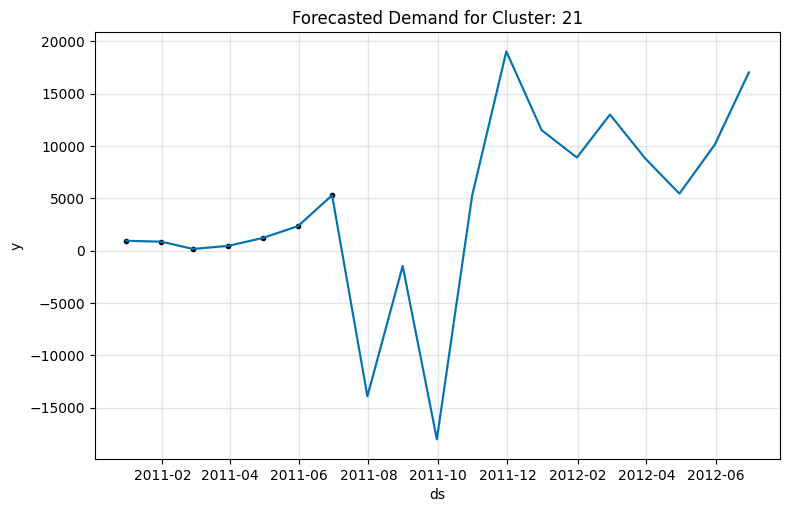

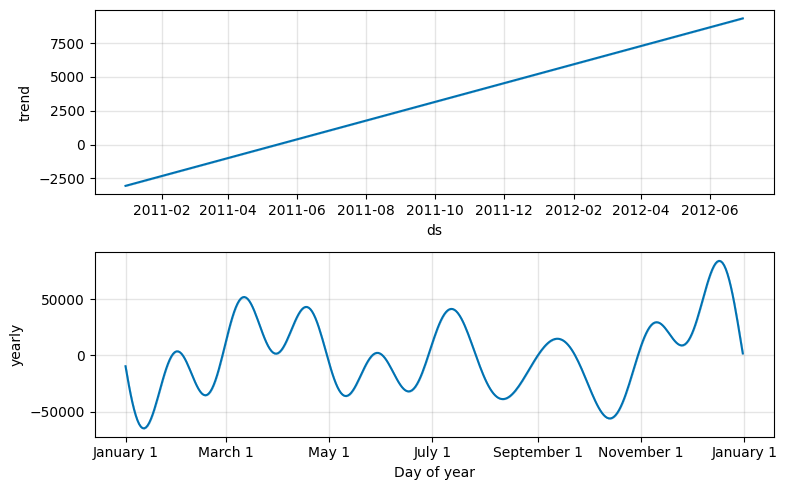

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/12h4d069.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/fq8eqcyd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70636', 'data', 'file=/tmp/tmp967ds4y3/12h4d069.json', 'init=/tmp/tmp967ds4y3/fq8eqcyd.json', 'output', 'file=/tmp/tmp967ds4y3/prophet_modelweo2r_ev/prophet_model-20230824012809.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:28:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Cluster: 21
Mean Absolute Error: 0.00630959744376014
Root Mean Squared Error: 0.007062589228751682


01:28:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


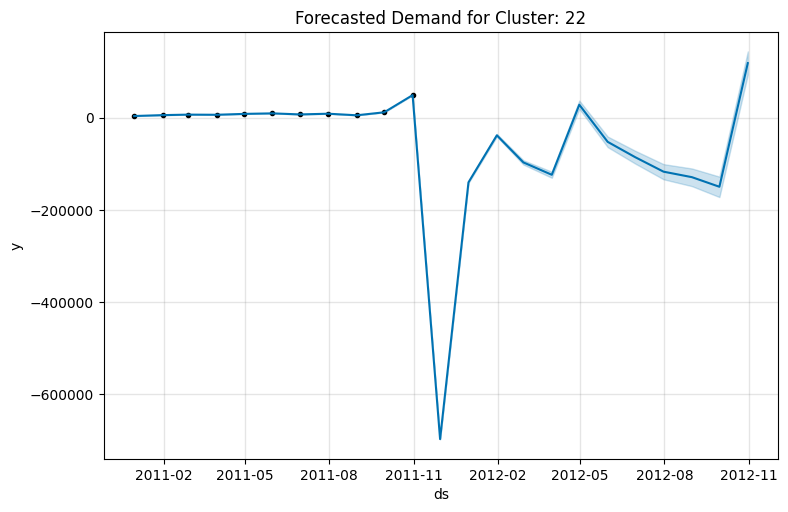

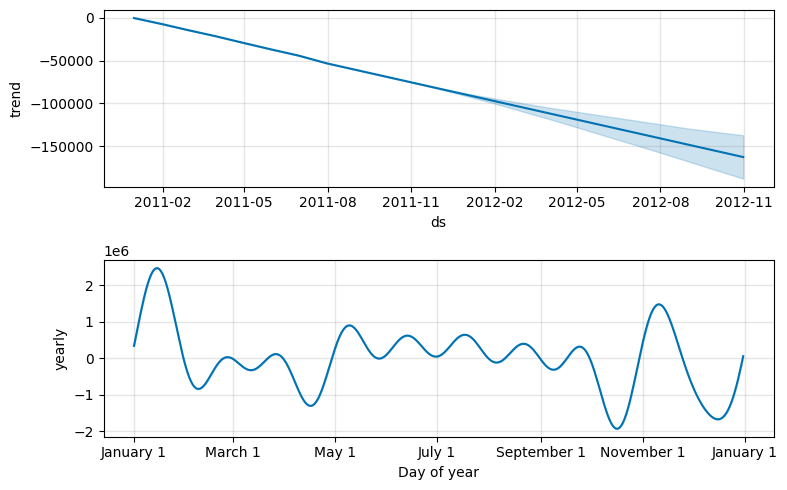

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/9wnhhdd4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/nq310qg2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87091', 'data', 'file=/tmp/tmp967ds4y3/9wnhhdd4.json', 'init=/tmp/tmp967ds4y3/nq310qg2.json', 'output', 'file=/tmp/tmp967ds4y3/prophet_modelumsmpzp_/prophet_model-20230824012810.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:28:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Cluster: 22
Mean Absolute Error: 0.28962399010439793
Root Mean Squared Error: 0.3686105823351921


01:28:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


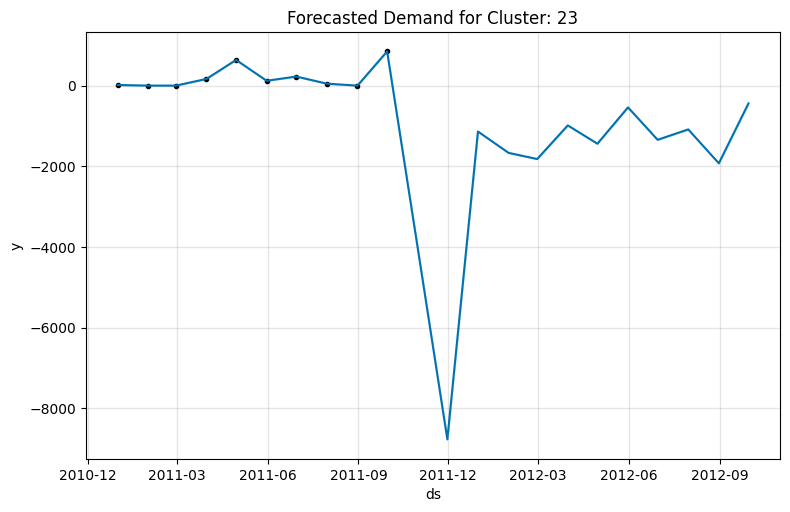

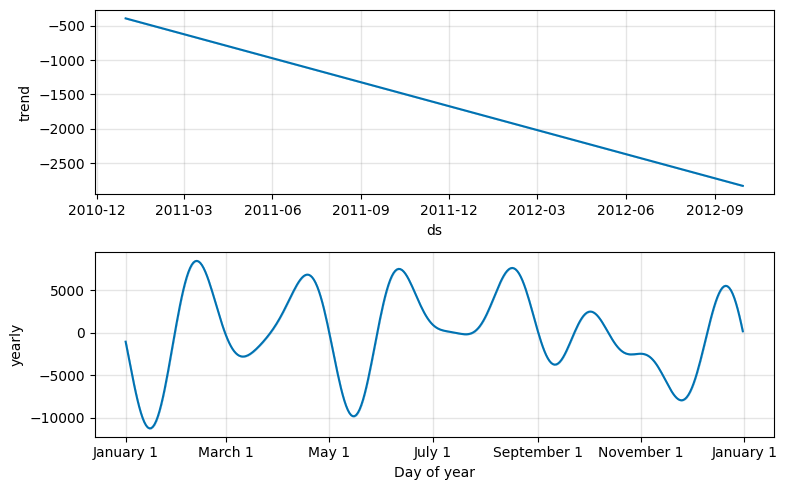

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/bwpxhwx7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp967ds4y3/4qha9bt0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99015', 'data', 'file=/tmp/tmp967ds4y3/bwpxhwx7.json', 'init=/tmp/tmp967ds4y3/4qha9bt0.json', 'output', 'file=/tmp/tmp967ds4y3/prophet_modelyskug003/prophet_model-20230824012811.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:28:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Cluster: 23
Mean Absolute Error: 0.0009588396092112816
Root Mean Squared Error: 0.0009801917286560648


01:28:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


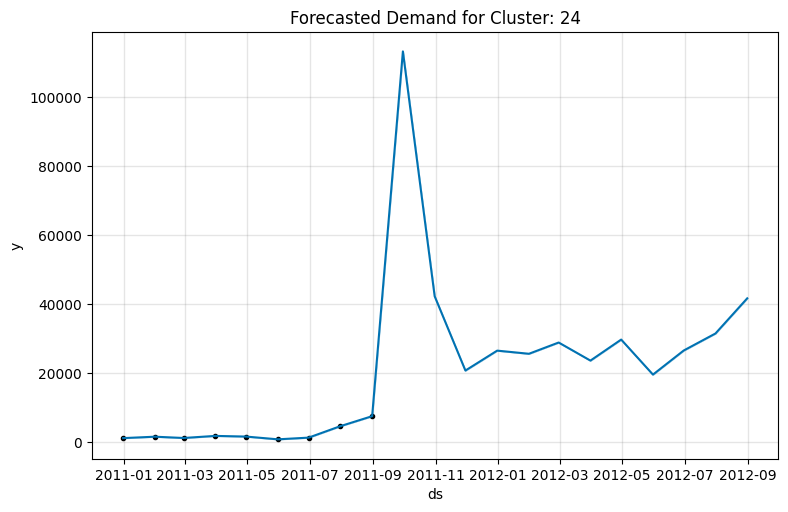

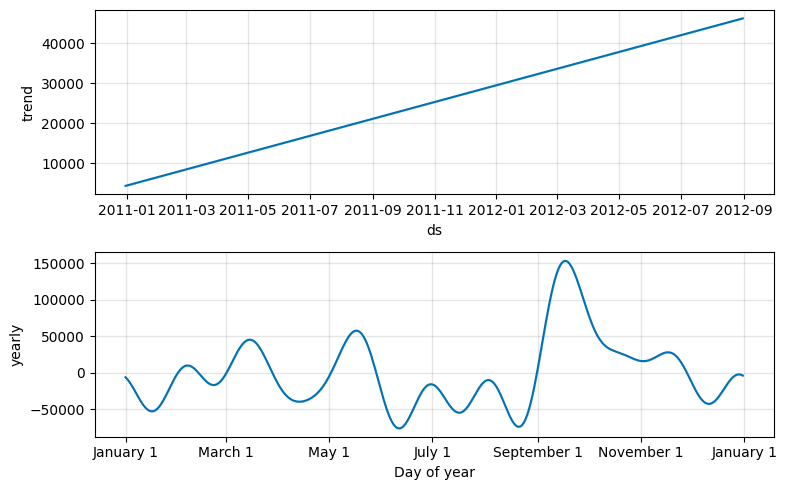

Cluster: 24
Mean Absolute Error: 0.03806577273280709
Root Mean Squared Error: 0.03992742028940793


In [ ]:

# Set the logging level to WARNING
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)

#Facebook Prophet Model

# Identify unique clusters and sort them in ascending order
clusters = sorted(df_rfm['Cluster_SOM'].unique())

# Check if 'CustomerID' is in df columns
if 'CustomerID' in df.columns:
    # Set 'CustomerID' as index for df
    df.set_index('CustomerID', inplace=True)

# Create a prophet model for each cluster and forecast demand
for cluster in clusters:
    # Get customer ids for the current cluster
    customer_ids = df_rfm[df_rfm['Cluster_SOM'] == cluster].index

    # Filter data for the specific cluster
    df_cluster = df[df.index.isin(customer_ids)]

    # Make sure InvoiceDate is in datetime format
    df_cluster.loc[:, 'InvoiceDate'] = pd.to_datetime(df_cluster['InvoiceDate'])

    # Set InvoiceDate as the index
    df_cluster = df_cluster.set_index('InvoiceDate')

    # Sum the quantity per month
    df_cluster = df_cluster.resample('M').sum().reset_index()

    # Prepare data for Prophet model (it requires 'ds' and 'y' labels for date and target)
    df_cluster = df_cluster.rename(columns={'InvoiceDate': 'ds', 'Quantity': 'y'})

    # Instantiate Prophet and fit the data (you may need to add extra parameters depending on your data)
    model = Prophet(yearly_seasonality=True)
    model.fit(df_cluster)

    # Define future time period, in this case 12 months
    future = model.make_future_dataframe(periods=12, freq='M')

    # Make the forecast
    forecast = model.predict(future)

    # Plot the forecast
    fig1 = model.plot(forecast, figsize=(8, 5))
    plt.title(f"Forecasted Demand for Cluster: {cluster}")
    plt.show()

    # Show components of the forecast
    fig2 = model.plot_components(forecast, figsize=(8, 5))
    plt.show()

    # Split the data into training and test sets
    split_index = int(len(df_cluster) * 0.8)
    train_data = df_cluster[:split_index]
    test_data = df_cluster[split_index:]

    # Forecast demand for the test period
    forecast_values = forecast['yhat'][split_index:split_index + len(test_data)]

    # Evaluate the forecast
    mae = mean_absolute_error(test_data['y'], forecast_values)
    rmse = mean_squared_error(test_data['y'], forecast_values, squared=False)

    # Print the evaluation metrics for the forecast
    print(f"Cluster: {cluster}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")


#Arima Model

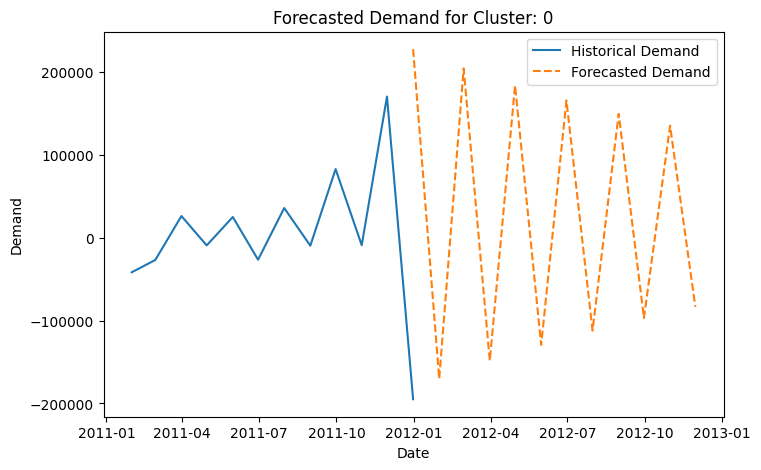

Cluster: 0
Mean Absolute Error: 325255.0992264859
Root Mean Squared Error: 332137.5842777283


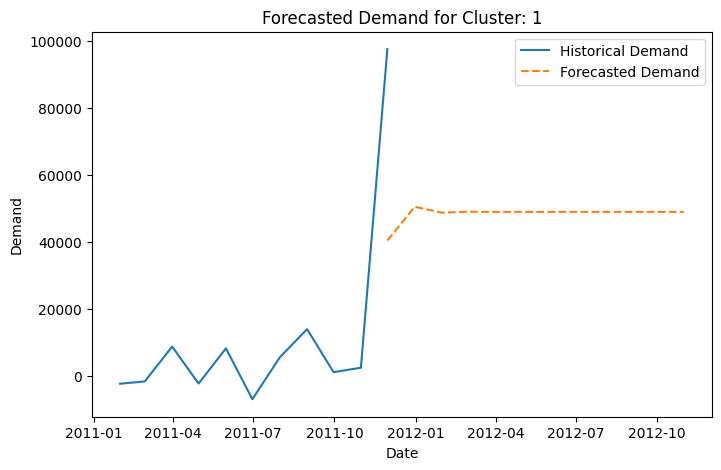

Cluster: 1
Mean Absolute Error: 45309.205074559926
Root Mean Squared Error: 45512.4745198595


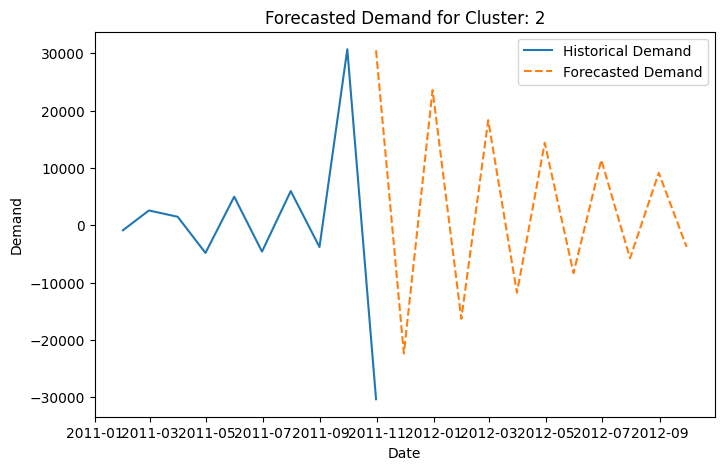

Cluster: 2
Mean Absolute Error: 47089.10607983882
Root Mean Squared Error: 47949.958118826406


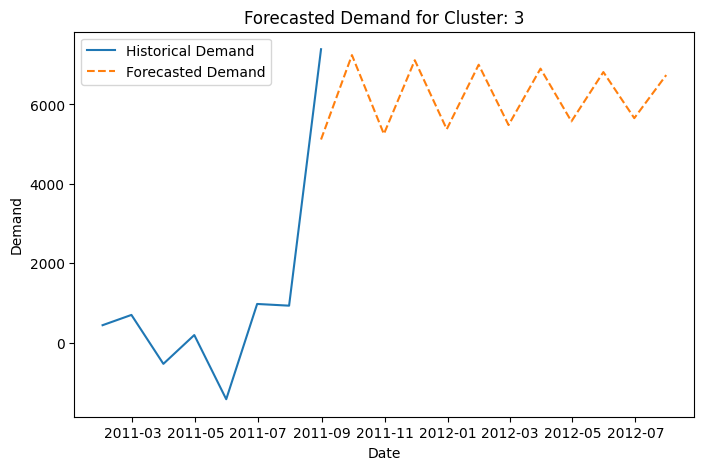

Cluster: 3
Mean Absolute Error: 2167.0976737009923
Root Mean Squared Error: 2961.971507896404


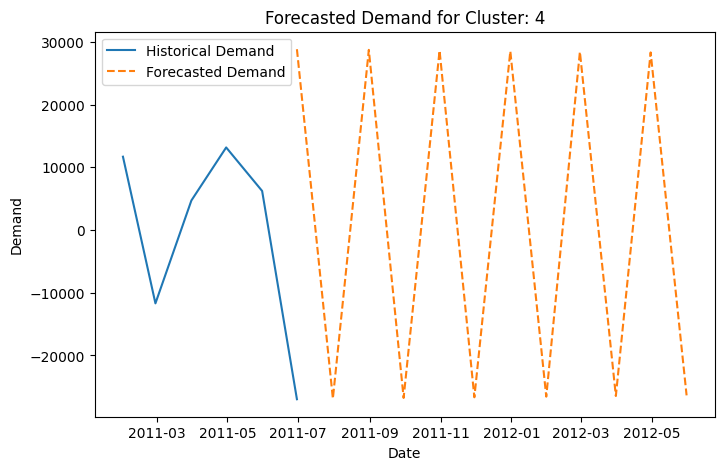

Cluster: 4
Mean Absolute Error: 11352.092372217172
Root Mean Squared Error: 15981.249337134996


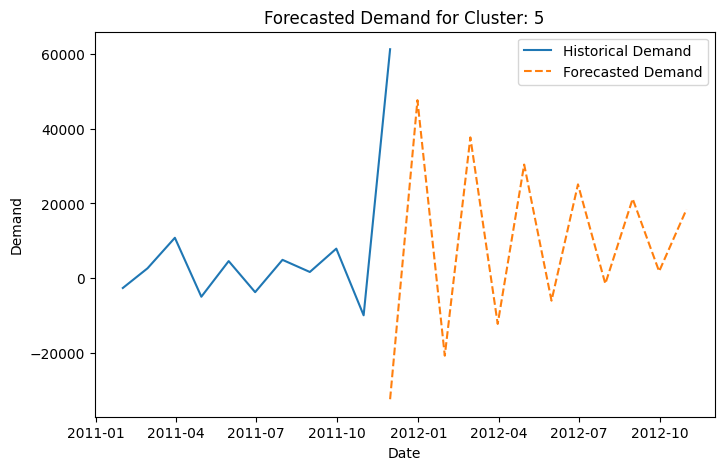

Cluster: 5
Mean Absolute Error: 59848.851361601985
Root Mean Squared Error: 62238.873140758405


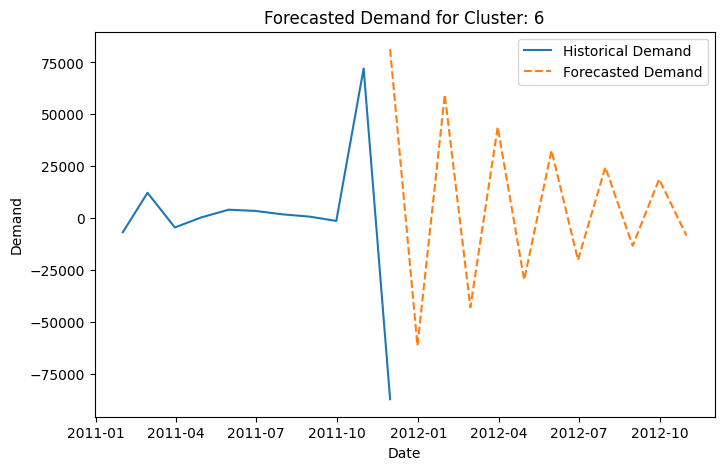

Cluster: 6
Mean Absolute Error: 120966.2206657938
Root Mean Squared Error: 124075.66962520812


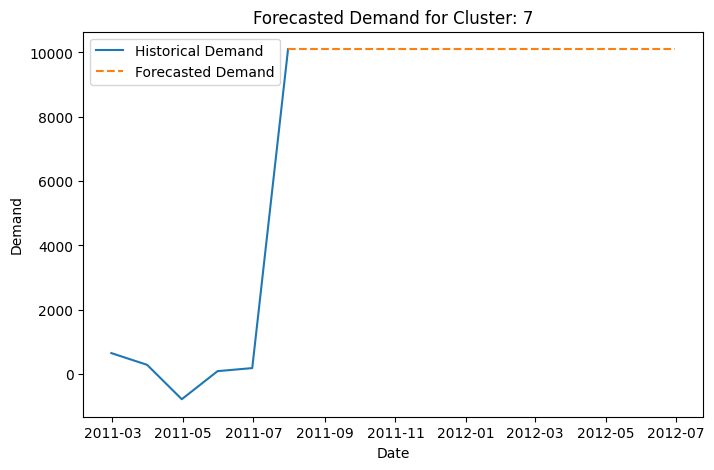

Cluster: 7
Mean Absolute Error: 4957.50003719041
Root Mean Squared Error: 7010.963761762209


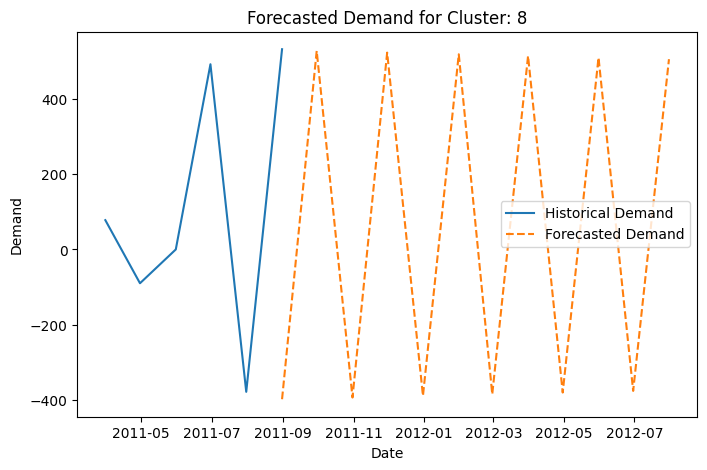

Cluster: 8
Mean Absolute Error: 12.1148196677035
Root Mean Squared Error: 14.288855907029783


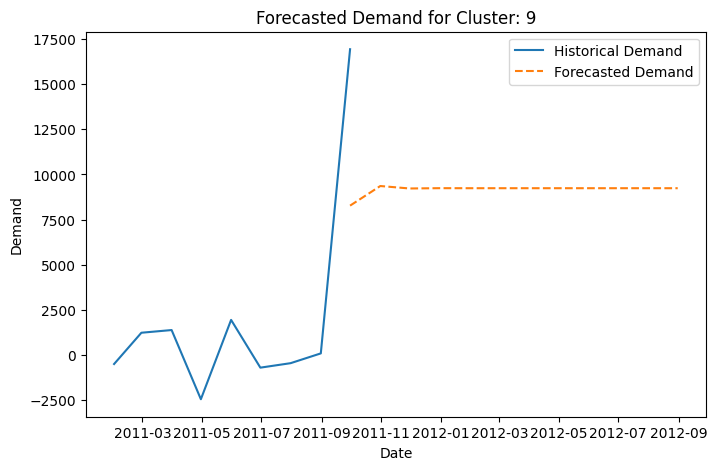

Cluster: 9
Mean Absolute Error: 7890.105080794994
Root Mean Squared Error: 7895.945950604117


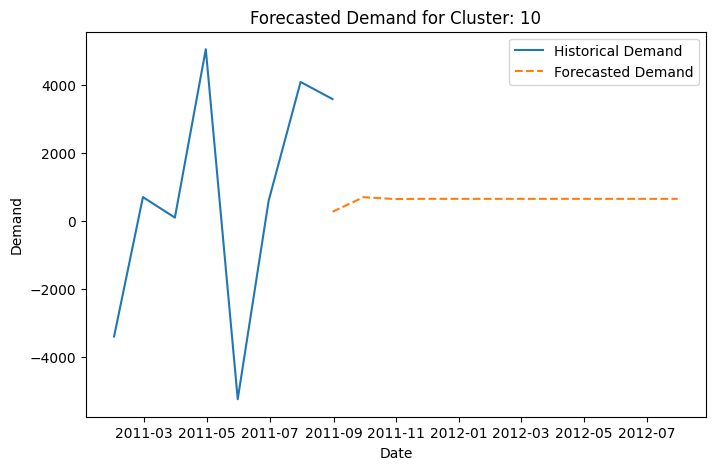

Cluster: 10
Mean Absolute Error: 3356.420578880082
Root Mean Squared Error: 3388.6983308179065


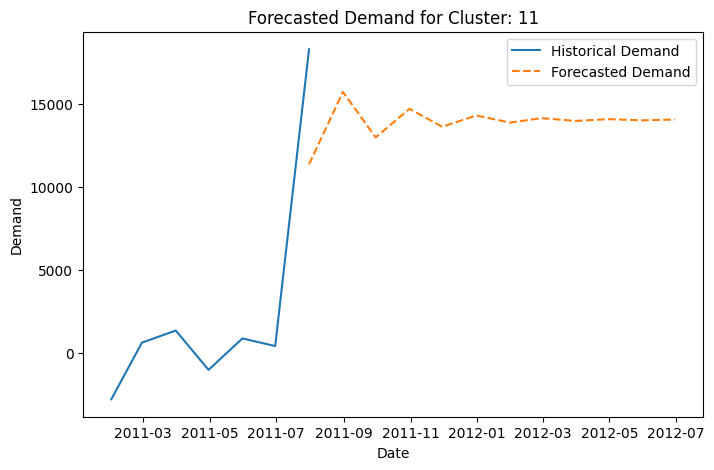

Cluster: 11
Mean Absolute Error: 6764.071205238483
Root Mean Squared Error: 7957.030098790062


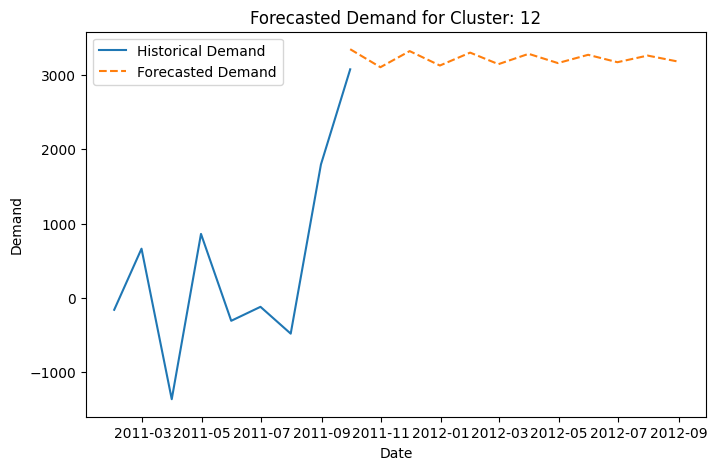

Cluster: 12
Mean Absolute Error: 789.3442020098789
Root Mean Squared Error: 1096.4362284260806


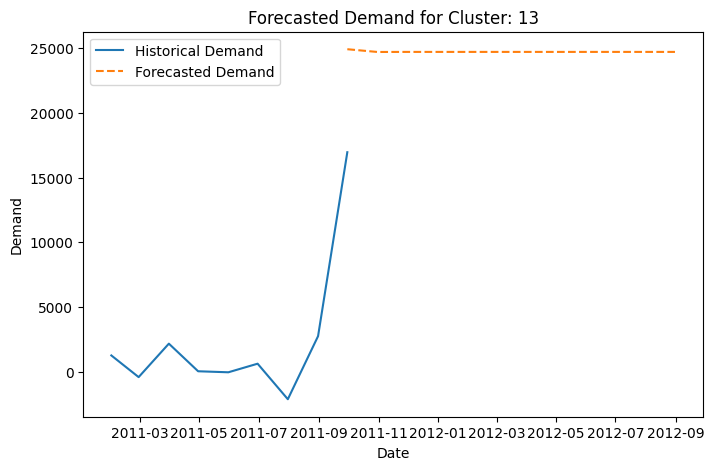

Cluster: 13
Mean Absolute Error: 14963.00495466694
Root Mean Squared Error: 16611.892210091388


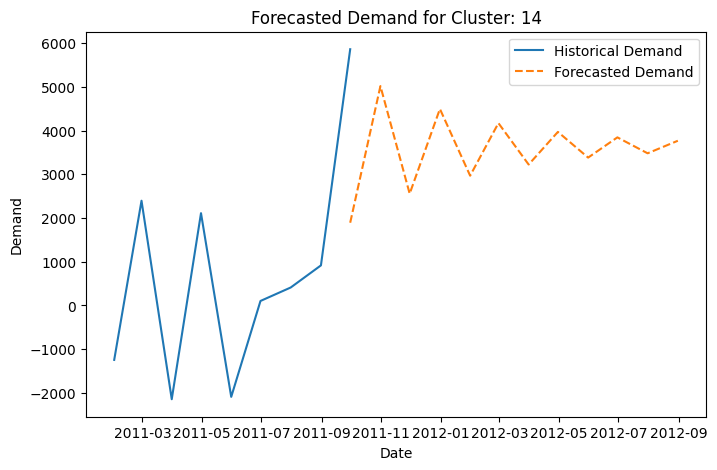

Cluster: 14
Mean Absolute Error: 909.4071513816245
Root Mean Squared Error: 911.8269514437408


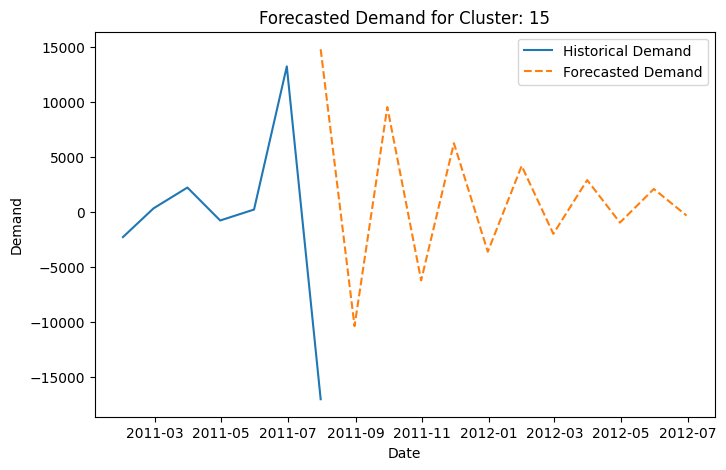

Cluster: 15
Mean Absolute Error: 4099.9892413861235
Root Mean Squared Error: 4822.427582148304


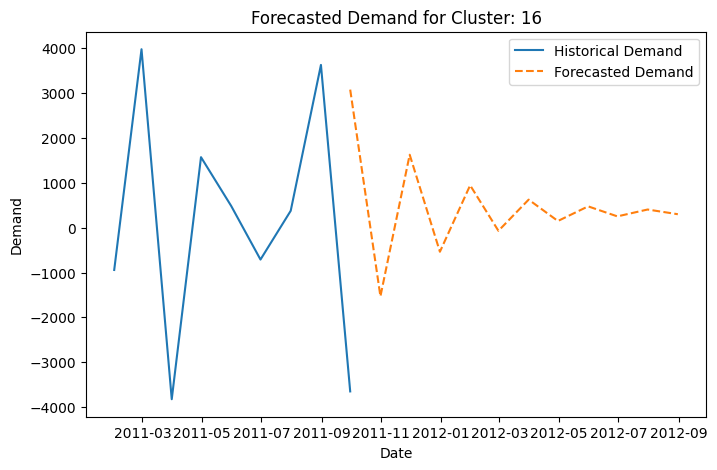

Cluster: 16
Mean Absolute Error: 1334.5042157038238
Root Mean Squared Error: 1547.8418742345746


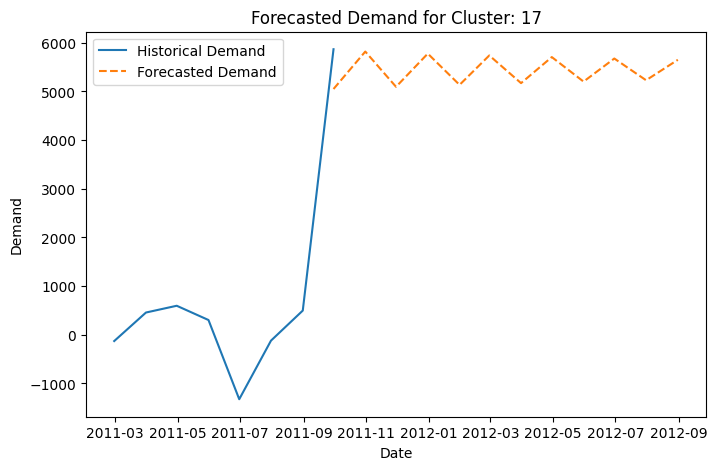

Cluster: 17
Mean Absolute Error: 2299.8805936676035
Root Mean Squared Error: 3218.784154339941


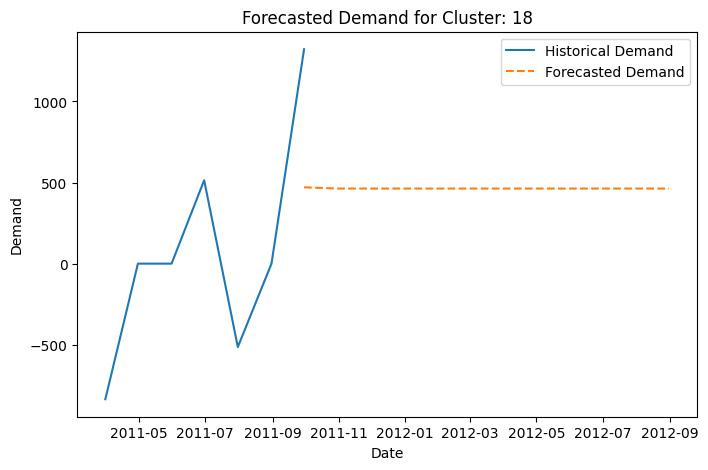

Cluster: 18
Mean Absolute Error: 664.7169405720551
Root Mean Squared Error: 692.5137867567473


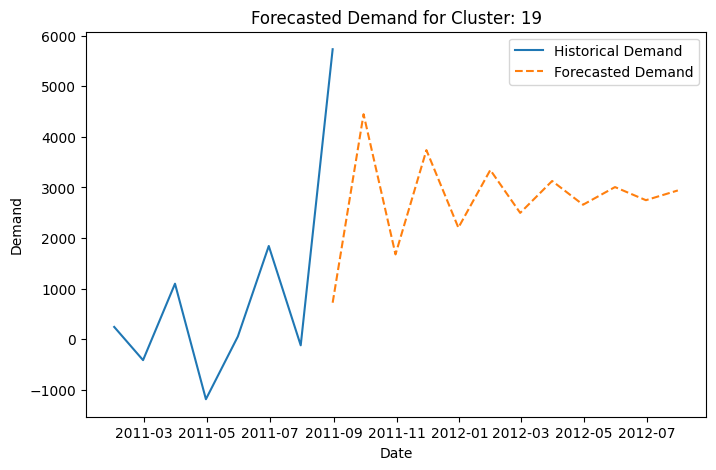

Cluster: 19
Mean Absolute Error: 1063.9214013540409
Root Mean Squared Error: 1086.648849146516


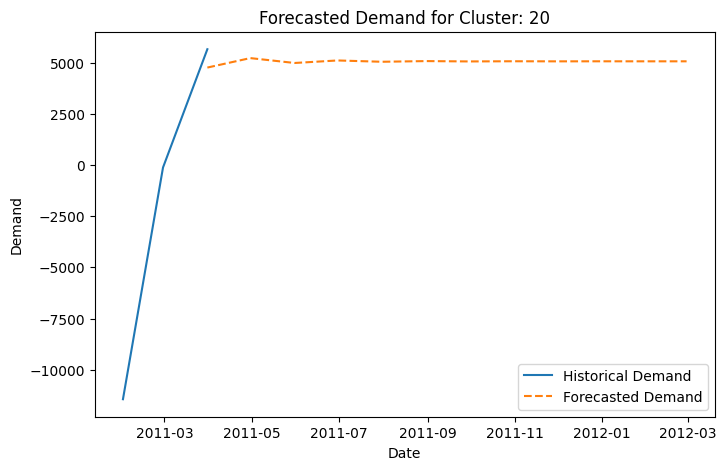

Cluster: 20
Mean Absolute Error: 895.2300260391994
Root Mean Squared Error: 895.2300260391994


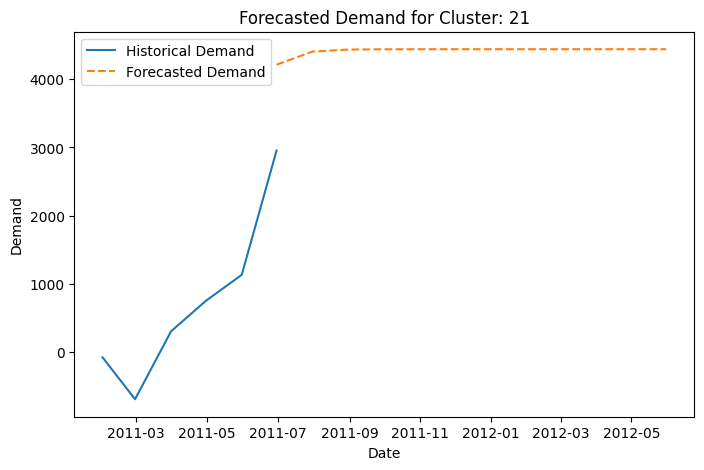

Cluster: 21
Mean Absolute Error: 2268.58528257265
Root Mean Squared Error: 2410.7810609120106


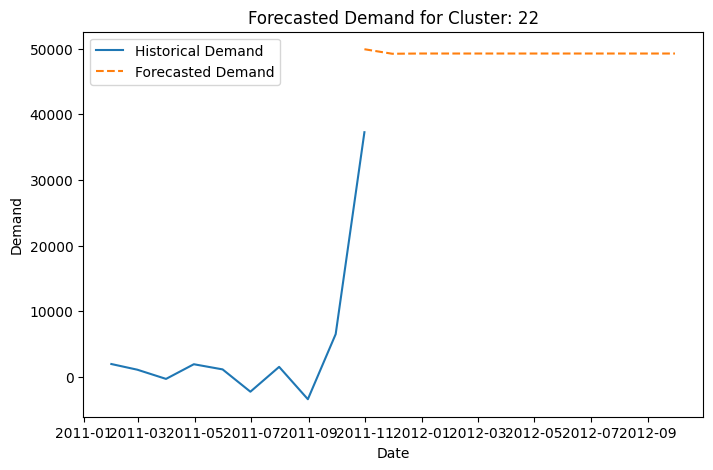

Cluster: 22
Mean Absolute Error: 36015.39156575198
Root Mean Squared Error: 40055.62322356264


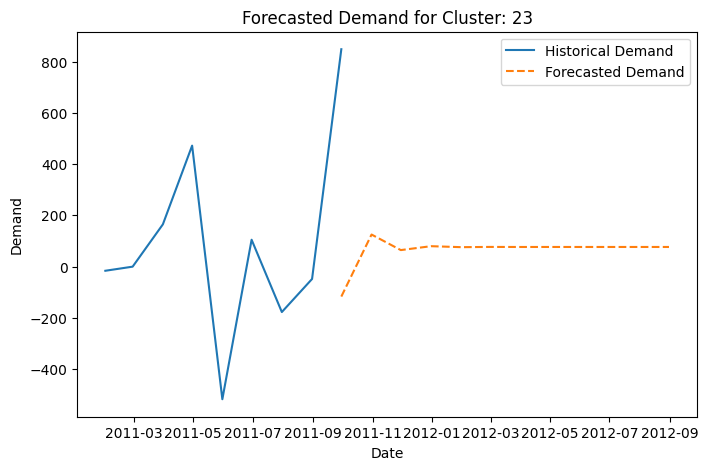

Cluster: 23
Mean Absolute Error: 395.683923943303
Root Mean Squared Error: 513.3376179402378


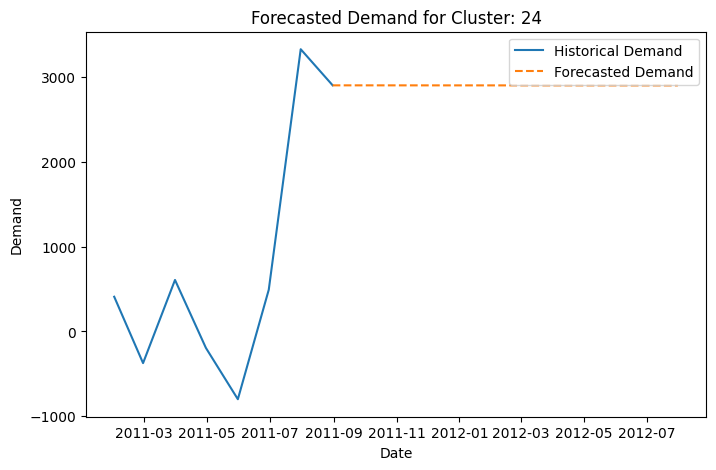

Cluster: 24
Mean Absolute Error: 213.1538874759774
Root Mean Squared Error: 301.30007022801334


In [ ]:


"""# ARIMA Model"""

# Identify unique clusters and sort them in ascending order
clusters = sorted(df_rfm['Cluster_SOM'].unique())

# Check if 'CustomerID' is in df columns
if 'CustomerID' in df.columns:
    # Set 'CustomerID' as index for df
    df.set_index('CustomerID', inplace=True)

# Create an ARIMA model for each cluster and forecast demand
for cluster in clusters:
    # Get customer ids for the current cluster
    customer_ids = df_rfm[df_rfm['Cluster_SOM'] == cluster].index

    # Filter data for the specific cluster
    df_cluster = df[df.index.isin(customer_ids)].copy()

    # Make sure InvoiceDate is in datetime format
    df_cluster['InvoiceDate'] = pd.to_datetime(df_cluster['InvoiceDate'])

    # Set InvoiceDate as the index
    df_cluster.set_index('InvoiceDate', inplace=True)

    # Sum the quantity per month
    df_cluster = df_cluster.resample('M').sum().reset_index()

    # Prepare data for ARIMA model (it requires 'ds' and 'y' labels for date and target)
    df_cluster = df_cluster.rename(columns={'InvoiceDate': 'ds', 'Quantity': 'y'})

    # Take the first difference to make the data stationary
    df_cluster['y'] = df_cluster['y'].diff().dropna()

    # Instantiate ARIMA model and fit the data
    model = sm.tsa.ARIMA(df_cluster['y'], order=(1, 1, 1))
    try:
        model_fit = model.fit()
    except ValueError:
        # Try different starting parameters if the model doesn't converge
        model = sm.tsa.ARIMA(df_cluster['y'], order=(1, 1, 1), start_params=[0, 0, 0, 0])
        model_fit = model.fit()

    # Define future time period, in this case 12 months
    future = pd.date_range(start=df_cluster['ds'].max(), periods=12, freq='M')

    # Make the forecast
    forecast_values = model_fit.forecast(steps=12)

    # Create a DataFrame for the forecast
    forecast = pd.DataFrame({'ds': future, 'yhat': forecast_values})

    # Plot the forecast
    plt.figure(figsize=(8, 5))
    plt.plot(df_cluster['ds'], df_cluster['y'], label='Historical Demand')
    plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Demand', linestyle='--')
    plt.title(f"Forecasted Demand for Cluster: {cluster}")
    plt.xlabel('Date')
    plt.ylabel('Demand')
    plt.legend()
    plt.show()

    # Split the data into training and test sets
    split_index = int(len(df_cluster) * 0.8)
    train_data = df_cluster[:split_index]
    test_data = df_cluster[split_index:]

    # Forecast demand for the test period
    forecast_values = forecast['yhat'].iloc[:len(test_data)]

    # Evaluate the forecast
    mae = mean_absolute_error(test_data['y'], forecast_values)
    rmse = mean_squared_error(test_data['y'], forecast_values, squared=False)

    # Print the evaluation metrics for the forecast
    print(f"Cluster: {cluster}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Root Mean Squared Error: {rmse}")
